In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# Introduction

In this seminar assignment, we will explore the data and build machine-learning models that predict the biodegradability of chemicals.

[Data set](https://www.openml.org/search?type=data&status=active&id=1494&sort=runs) containing values for 
**41 attributes** (`molecular descriptors`) used to classify 1055 chemicals into **2 classes** (`ready` and `not ready` biodegradable).

## Attribute information

41 molecular descriptors (features) and 1 experimental class:

| Feature Name | Feature Information (Molecular Descriptor) | Type | Distinct values / Missing attributes |
| --- | --- | --- | --- |
| Class (target) | ready biodegradable (RB) and not ready biodegradable (NRB) | nominal | 2/0 |
| V1  | SpMax_L: Leading eigenvalue from Laplace matrix | numeric | 440/0 |
| V2  | J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity | numeric | 1022/0 |
| V3  | nHM: Number of heavy atoms | numeric | 11/0 |
| V4  | F01\[N-N\]: Frequency of N-N at topological distance 1 | numeric | 4/0 |
| V5  | F04\[C-N\]: Frequency of C-N at topological distance 4 | numeric | 16/0 |
| V6  | NssssC: Number of atoms of type ssssC | numeric | 13/0 |
| V7  | nCb-: Number of substituted benzene C(sp2) | numeric | 15/0 |
| V8  | C%: Percentage of C atoms | numeric | 188/0 |
| V9  | nCp: Number of terminal primary C(sp3) | numeric | 15/0 |
| V10 | nO: Number of oxygen atoms | numeric | 12/0 |
| V11 | F03\[C-N\]: Frequency of C-N at topological distance 3 | numeric | 21/0 |
| V12 | SdssC: Sum of dssC E-states | numeric | 384/0 |
| V13 | HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass | numeric | 756/0 |
| V14 | LOC: Lopping centric index | numeric | 373/0 |
| V15 | SM6_L: Spectral moment of order 6 from Laplace matrix | numeric | 510/0 |
| V16 | F03\[C-O\]: Frequency of C - O at topological distance 3 | numeric | 24/0 |
| V17 | Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom) | numeric | 167/0 |
| V18 | Mi: Mean first ionization potential (scaled on Carbon atom) | numeric | 125/0 |
| V19 | nN-N: Number of N hydrazines | numeric | 3/0 |
| V20 | nArNO2: Number of nitro groups (aromatic) | numeric | 4/0 |
| V21 | nCRX3: Number of CRX3 | numeric | 4/0 |
| V22 | SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability | numeric | 352/0 |
| V23 | nCIR: Number of circuits | numeric | 13/0 |
| V24 | B01\[C-Br\]: Presence/absence of C - Br at topological distance 1 | numeric | 2/0 |
| V25 | B03\[C-Cl\]: Presence/absence of C - Cl at topological distance 3 | numeric | 2/0 |
| V26 | N-073: Ar2NH / Ar3N / Ar2N- |  numeric   | 4/0    |
| V27 | SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index) | numeric | 329/0 |
| V28 | Psi\_i\_1d: Intrinsic state pseudoconnectivity index - type 1d | numeric | 205/0 |
| V29 | B04\[C-Br\]: Presence/absence of C - Br at topological distance 4 | numeric | 2/0 |
| V30 | SdO: Sum of dO E-states | numeric | 470/0 |
| V31 | TI2_L: Second Mohar index from Laplace matrix | numeric | 553/0 |
| V32 | nCrt: Number of ring tertiary C(sp3) | numeric | 8/0 |
| V33 | C-026: R--CX--R | numeric | 11/0 |
| V34 | F02\[C-N\]: Frequency of C - N at topological distance 2 | numeric | 16/0 |
| V35 | nHDon: Number of donor atoms for H-bonds (N and O) | numeric | 8/0 |
| V36 | SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass | numeric | 705/0 |
| V37 | Psi\_i\_A: Intrinsic state pseudoconnectivity index - type S average |  numeric   | 624/0    |
| V38 | nN: Number of Nitrogen atoms | numeric | 8/0 |
| V39 | SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass | numeric | 862/0 |
| V40 | nArCOOR: Number of esters (aromatic) | numeric | 5/0 |
| V41 | nX: Number of halogen atoms | numeric | 17/0 |

## 1. Data Preprocessing

### 1.1 Importing the dataset

In [2]:
# Inspect the dataset. How balanced is the target variable (degradability)?
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

X_train = dataset_train.iloc[:, :-1].values
y_train = dataset_train.iloc[:, -1].values

X_test = dataset_test.iloc[:, :-1].values
y_test = dataset_test.iloc[:, -1].values

### 1.2 Checking for missing values

In [3]:
num_missing = np.sum(np.isnan(X_train))
print(f"Number of missing values in X: {num_missing}")
num_missing = np.sum(np.isnan(y_train))
print(f"Number of missing values in y: {num_missing}")

# Check if there are any missing values present in the dataset
# If there are, print the index of the sample
total_missing = 0
missing_indices = []
for i in range(len(X_train)):
    if np.isnan(X_train[i]).any():
        missing_indices.append(i)
        # Also check if line contains more than one missing value
        if len(np.where(np.isnan(X_train[i]))[0]) > 1:
            print("Sample {} has more than one missing value".format(i))
        total_missing += 1
print("Total number of samples with missing values: {}".format(total_missing))

print("Indices of samples with missing values: {}".format(sorted(missing_indices)))

Number of missing values in X: 82
Number of missing values in y: 0
Sample 689 has more than one missing value
Total number of samples with missing values: 81
Indices of samples with missing values: [10, 13, 32, 42, 55, 60, 64, 66, 68, 69, 73, 78, 87, 89, 98, 104, 130, 131, 146, 152, 158, 171, 179, 188, 189, 223, 242, 246, 260, 268, 292, 302, 313, 326, 338, 360, 361, 373, 375, 390, 403, 410, 411, 431, 432, 439, 470, 498, 509, 511, 528, 544, 546, 556, 573, 577, 585, 589, 593, 595, 602, 612, 617, 648, 649, 665, 676, 678, 680, 689, 706, 719, 748, 752, 764, 766, 767, 791, 806, 809, 839]


### 1.3. Taking care of the missing data

In [4]:
# Replace missing values with the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

### Data Statistics

In [5]:
feature_names = [
    "SpMax_L",
    "J_Dz(e)",
    "nHM",
    "F01\\[N-N\\]",
    "F04\\[C-N\\]",
    "NssssC",
    "nCb-",
    "C%",
    "nCp",
    "nO",
    "F03\\[C-N\\]",
    "SdssC",
    "HyWi_B(m)",
    "LOC",
    "SM6_L",
    "F03\\[C-O\\]",
    "Me",
    "Mi",
    "nN-N",
    "nArNO2",
    "nCRX3",
    "SpPosA_B(p)",
    "nCIR",
    "B01\\[C-Br\\]",
    "B03\\[C-Cl\\]",
    "N-073",
    "SpMax_A",
    "Psi\\_i\\_1d",
    "B04\\[C-Br\\]",
    "SdO",
    "TI2_L",
    "nCrt",
    "C-026",
    "F02\\[C-N\\]",
    "nHDon",
    "SpMax_B(m)",
    "Psi\\_i\\_A",
    "nN",
    "SM6_B(m)",
    "nArCOOR",
    "nX",
]

NUM_FEATURES = 41
data_stats = np.zeros((NUM_FEATURES, 4))
for i in range(NUM_FEATURES):
    data_stats[i, 0] = np.min(X_train[:, i])
    data_stats[i, 1] = np.max(X_train[:, i])
    data_stats[i, 2] = np.mean(X_train[:, i])
    data_stats[i, 3] = np.std(X_train[:, i])

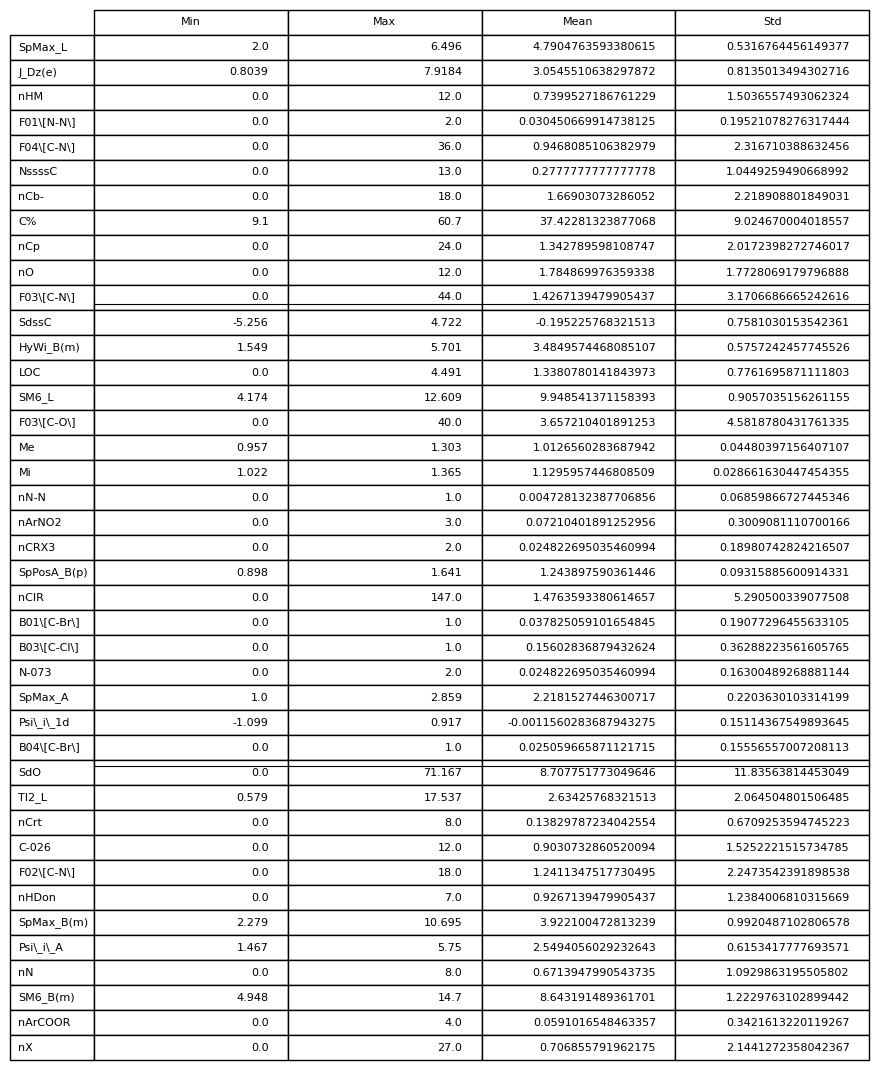

In [44]:
# Plot a table
fig, ax = plt.subplots(figsize=(10, 6))


table = ax.table(
    cellText=data_stats,
    rowLabels=feature_names,
    colLabels=["Min", "Max", "Mean", "Std"],
    loc="center",
)

table.set_fontsize(20)
table.scale(1, 1.5)

# Remove the tick marks and labels from the axes
ax.set_xticks([])
ax.set_yticks([])
plt.show()

#### Pie chart of the target variable

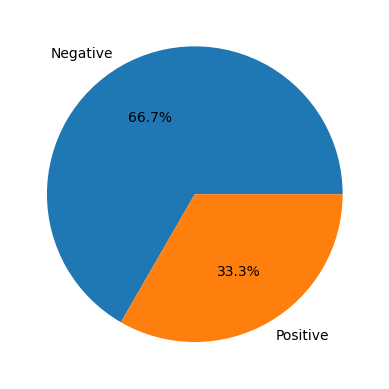

In [7]:
# Create a piechart of the target variable
negative = np.sum(y_train == 1)
positive = np.sum(y_train == 2)

plt.pie([negative, positive], labels=["Negative", "Positive"], autopct="%1.1f%%")
plt.show()

### Inputs-targets correlations

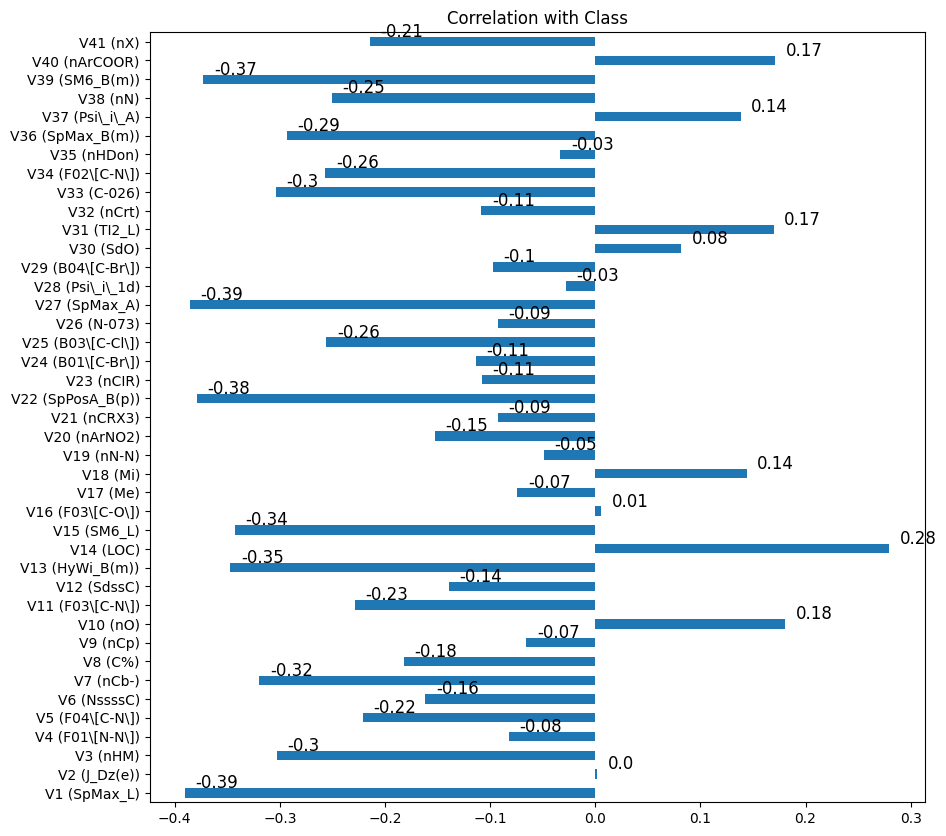

In [45]:
target = dataset_train['Class']

correlations = dataset_train.corr()['Class'].drop('Class')

titles = list(correlations.index)
# Combine titles with feature names
feature_names_list = [feature_names[i] for i in range(len(titles))]
titles = [titles[i] + " (" + feature_names_list[i] + ")" for i in range(len(titles))]

# To correlations add feature names
correlations.index = titles

# Plot correlations with results. Horizontal bars with correlation written on them
plt.figure(figsize=(10, 10))
correlations.plot(kind='barh')
plt.title('Correlation with Class')

# Add ratings to the plot
for i, v in enumerate(correlations):
    plt.text(v + 0.01, i + .25, str(round(v, 2)), color='black', fontsize=12)
    
plt.show()

In [46]:
# Make a graph of correlation between two features
def plot_correlation(feature1, feature2):
    # Scatter with value of Class variable as 1
    # Get column name of feature1
    feature1_v_name = dataset_train.columns[feature1]
    feature2_v_name = dataset_train.columns[feature2]
    feature1_name = feature_names[feature1]
    feature2_name = feature_names[feature2]

    plt.figure(figsize=(10, 10))
    biodegradable1 = dataset_train[feature1_v_name][dataset_train['Class'] == 1]
    biodegradable2 = dataset_train[feature2_v_name][dataset_train['Class'] == 1]
    non_biodegradable1 = dataset_train[feature1_v_name][dataset_train['Class'] == 2]
    non_biodegradable2 = dataset_train[feature2_v_name][dataset_train['Class'] == 2]
    plt.scatter(biodegradable1, biodegradable2)
    plt.scatter(non_biodegradable1, non_biodegradable2)
    plt.title("Correlation between {} and {}".format(feature1_name, feature2_name))
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.legend(["Biodegradable", "Non Biodegradable"])
    plt.show()
     

We can see from the bar plot above, that the highest correlation with the target variable is the feature `V14` (LOC) with a correlation of 0.28 and the lowest correlation is the feature `V1` (SpMax_L) with a correlation of -0.39.

Below we can see the distribution of these features in comparison to the target variable.

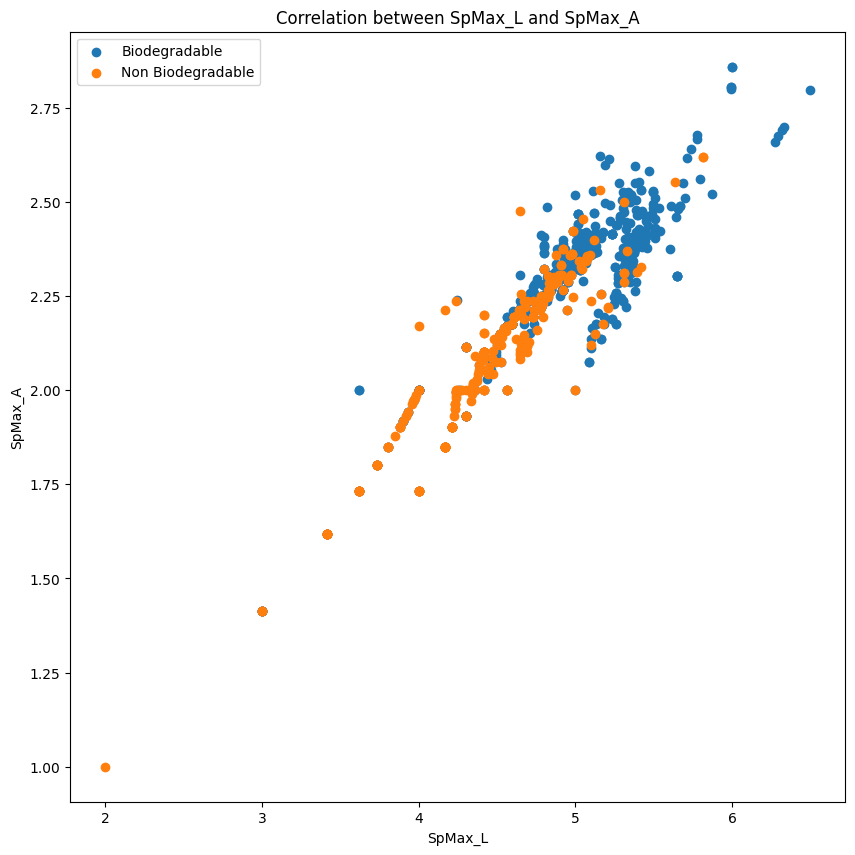

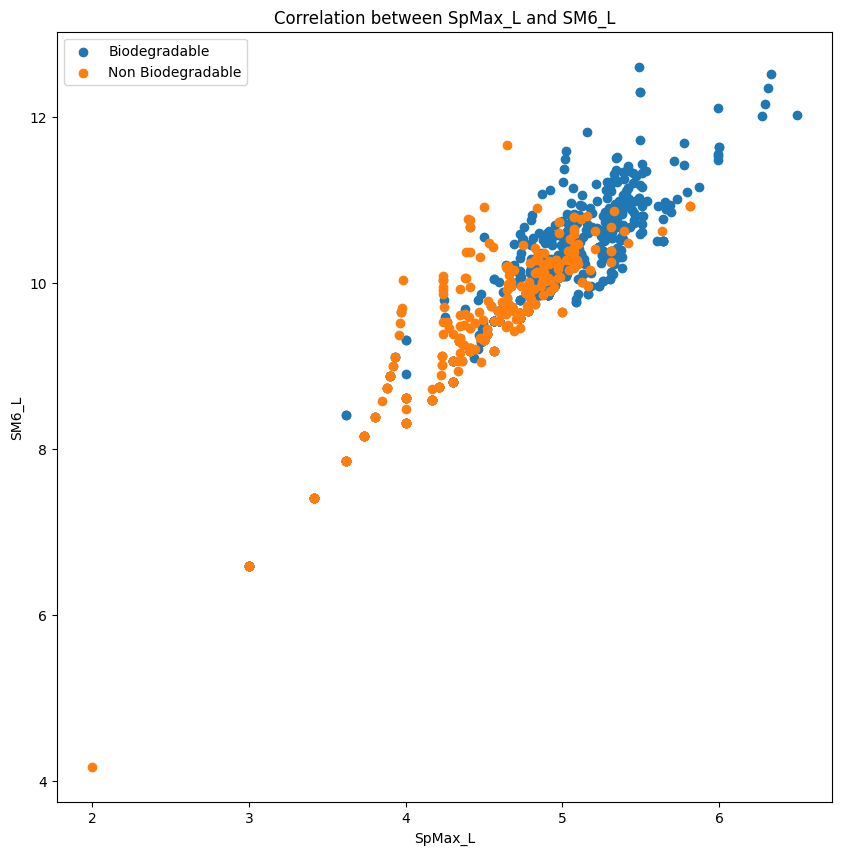

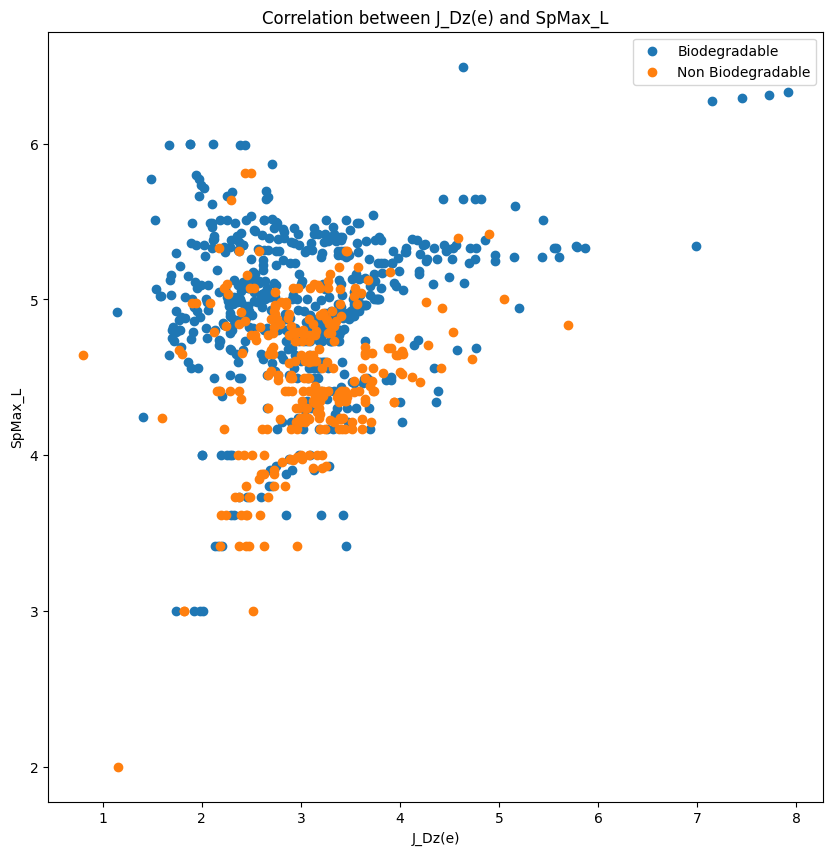

In [49]:
# Call plot_correlation with two features

# V1 and V27
plot_correlation(0, 26)
# V1 and V14
plot_correlation(0, 14)

# V2 and V1
plot_correlation(1,0)

### 1.4. Encoding dependent variable ([1,2] -> [0,1])

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

### 1.5. Feature Scaling

Use `standardization`: $X = \frac{X - \mu}{\sigma}$

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2. Modeling

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

classifiers = dict()
classifiers_tuned = dict()

### 2.1 Logistic Regresssion

In [14]:
lreg_classifier = LogisticRegression(random_state=0)
lreg_classifier.fit(X_train, y_train)
classifiers["Logistic Regression"] = lreg_classifier

#### Tuning the hyperparameters

In [15]:
# Define the hyperparamter grid for logistic regression
parameters = {"C": [0.1, 1, 10, 100, 1000], "penalty": ["l1", "l2"], "solver": ["liblinear"]}
# Create the grid search object
lreg_tuned = GridSearchCV(
    estimator=lreg_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
# Fit the grid search object to the training data
lreg_tuned.fit(X_train, y_train)
classifiers_tuned["Logistic Regression"] = lreg_tuned

### 2.2 K-Nearest Neighbors

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_classifier.fit(X_train, y_train)
classifiers["K-Nearest Neighbors"] = knn_classifier

#### Tuning the hyperparameters

In [17]:
parameters = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], "metric": ["euclidean", "manhattan", "minkowski"]}
knn_tuned = GridSearchCV(
    estimator=knn_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
knn_tuned.fit(X_train, y_train)
classifiers_tuned["K-Nearest Neighbors"] = knn_tuned

### 2.3 Kernel Support Vector Classifier

In [18]:
svc_classifier = SVC(kernel="rbf", random_state=0, probability=True)
svc_classifier.fit(X_train, y_train)
classifiers["Kernel Support Vector Classification"] = svc_classifier

#### Tuning the hyperparameters

In [19]:
parameters = [
    {"C": [0.25, 0.5, 0.75, 1], "kernel": ["linear"]},
    {
        "C": [0.25, 0.5, 0.75, 1],
        "kernel": ["rbf"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
]
svc_classifier_tuned = GridSearchCV(
    estimator=svc_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
svc_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Kernel Support Vector Classification"] = svc_classifier_tuned

### 2.4 Naive Bayes

In [20]:
gauss_classifier = GaussianNB()
gauss_classifier.fit(X_train, y_train)
classifiers["Naive Bayes"] = gauss_classifier

### 2.5 Decision Tree Classifier 

In [21]:
dtree_classifier = DecisionTreeClassifier(criterion="entropy", random_state=0)
dtree_classifier.fit(X_train, y_train)
classifiers["Decision Tree Classification"] = dtree_classifier

#### Tuning the hyperparameters

In [22]:
parameters = {"criterion": ["gini", "entropy"], "max_depth": [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]}
dtree_classifier_tuned = GridSearchCV(
    estimator=dtree_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
dtree_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Decision Tree Classification"] = dtree_classifier_tuned

### 2.6 Random Forest Classifier

In [23]:
rfc_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)
classifiers ["Random Forest Classification"] = rfc_classifier

#### Tuning the hyperparameters

In [24]:
parameters = {
    "n_estimators": [10, 50, 100, 200, 300, 400, 500],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 15, 20],
}
rfc_classifier_tuned = GridSearchCV(
    estimator=rfc_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
rfc_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["Random Forest Classification"] = rfc_classifier_tuned

### 2.7 XGBoost Classifier

In [25]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
classifiers["XGBoost"] = xgb_classifier

#### Parameter tuning

In [26]:
parameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.5, 1],
    "max_depth": [1, 3, 6],
    "reg_lambda": [0, 0.5, 1],
    "n_estimators": [100, 200, 300, 400, 500],
}
xgb_classifier_tuned = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=parameters,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
xgb_classifier_tuned.fit(X_train, y_train)
classifiers_tuned["XGBoost"] = xgb_classifier_tuned

## 3. Evaluation

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
for classifier in classifiers:
    # Peroform k-fold cross validation
    accuracies = cross_val_score(estimator=classifiers[classifier], X=X_train, y=y_train, cv=10)
    print("-"*30 + classifier + "-"*30)
    print("Accuracy of {} is {:.2f} %".format(classifier, accuracies.mean()*100))
    print("Standard Deviation of {} is {:.2f} %".format(classifier, accuracies.std()*100))

------------------------------Logistic Regression------------------------------
Accuracy of Logistic Regression is 86.40 %
Standard Deviation of Logistic Regression is 4.29 %
------------------------------K-Nearest Neighbors------------------------------
Accuracy of K-Nearest Neighbors is 85.09 %
Standard Deviation of K-Nearest Neighbors is 5.19 %
------------------------------Kernel Support Vector Classification------------------------------
Accuracy of Kernel Support Vector Classification is 86.16 %
Standard Deviation of Kernel Support Vector Classification is 4.18 %
------------------------------Naive Bayes------------------------------
Accuracy of Naive Bayes is 67.36 %
Standard Deviation of Naive Bayes is 5.32 %
------------------------------Decision Tree Classification------------------------------
Accuracy of Decision Tree Classification is 80.00 %
Standard Deviation of Decision Tree Classification is 7.19 %
------------------------------Random Forest Classification-------------

In [83]:
for classifier in classifiers_tuned:
    print("-"*30 + classifier + "-"*30)
    print("Best Accuracy of {} is {:.2f} %".format(classifier, classifiers_tuned[classifier].best_score_*100))
    print("Best Parameters of {} is {}".format(classifier, classifiers_tuned[classifier].best_params_))
    # print("Best Estimator of {} is {}".format(classifier, classifiers_tuned[classifier].best_estimator_))
    print("Standard Deviation of {} is {:.2f} %".format(classifier, classifiers_tuned[classifier].cv_results_["std_test_score"][classifiers_tuned[classifier].best_index_]*100))

------------------------------Logistic Regression------------------------------
Best Accuracy of Logistic Regression is 86.28 %
Best Parameters of Logistic Regression is {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Standard Deviation of Logistic Regression is 4.33 %
------------------------------K-Nearest Neighbors------------------------------
Best Accuracy of K-Nearest Neighbors is 85.32 %
Best Parameters of K-Nearest Neighbors is {'metric': 'manhattan', 'n_neighbors': 17}
Standard Deviation of K-Nearest Neighbors is 7.28 %
------------------------------Kernel Support Vector Classification------------------------------
Best Accuracy of Kernel Support Vector Classification is 86.64 %
Best Parameters of Kernel Support Vector Classification is {'C': 0.25, 'kernel': 'linear'}
Standard Deviation of Kernel Support Vector Classification is 3.89 %
------------------------------Decision Tree Classification------------------------------
Best Accuracy of Decision Tree Classification is 81.5

In [30]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score

In [65]:
def evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model_score = model.score(X_test, y_test)
    # Predict the labels
    y_pred = model.predict(X_test)
    y_pred_pos = model.predict_proba(X_test)
    y_pred_pos = y_pred_pos[:, 1]
    metrics = [
        'accuracy',
        'f1',
        'precision',
        'recall',
        'roc_auc'
    ]
    
    scores = []
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
        scores.append(score)
         
    # Calculate roc auc score
    roc_a = roc_auc_score(y_test, y_pred_pos)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_pred_pos)

    
    scores_10 = []
    for metric in metrics:
        score = cross_val_score(model, X_train, y_train, cv=10, scoring=metric)
        scores_10.append(score)
    
    print("Training accuracy: {}, Test accuracy: {} ".format(model.score(X_train, y_train), model_score))
    
    scores = np.array(scores)
    scores_10 = np.array(scores_10)
    return scores, scores_10, (fpr, tpr, roc_a)

------------------------------Logistic Regression------------------------------
Training accuracy: 0.8900709219858156, Test accuracy: 0.8277511961722488 
Mean score of 5 folds: 0.8371900091224181
Mean score of 10 folds: 0.8338818720486272
Standard Deviation score for 5 folds: 0.06306617402019254
Standard Deviation score for 10 folds: 0.0804611942927121
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.882353  0.827586   0.827586  0.827586  0.951970
1  0.894118  0.836364   0.884615  0.793103  0.943350
2  0.823529  0.693878   0.809524  0.607143  0.852130
3  0.929412  0.892857   0.892857  0.892857  0.987469
4  0.823529  0.745763   0.709677  0.785714  0.881579
5  0.882353  0.827586   0.800000  0.857143  0.958647
6  0.785714  0.709677   0.647059  0.785714  0.838648
7  0.857143  0.777778   0.807692  0.750000  0.871811
8  0.916667  0.877193   0.862069  0.892857  0.937500
9  0.845238  0.754717   0.800000  0.714286  0.940051


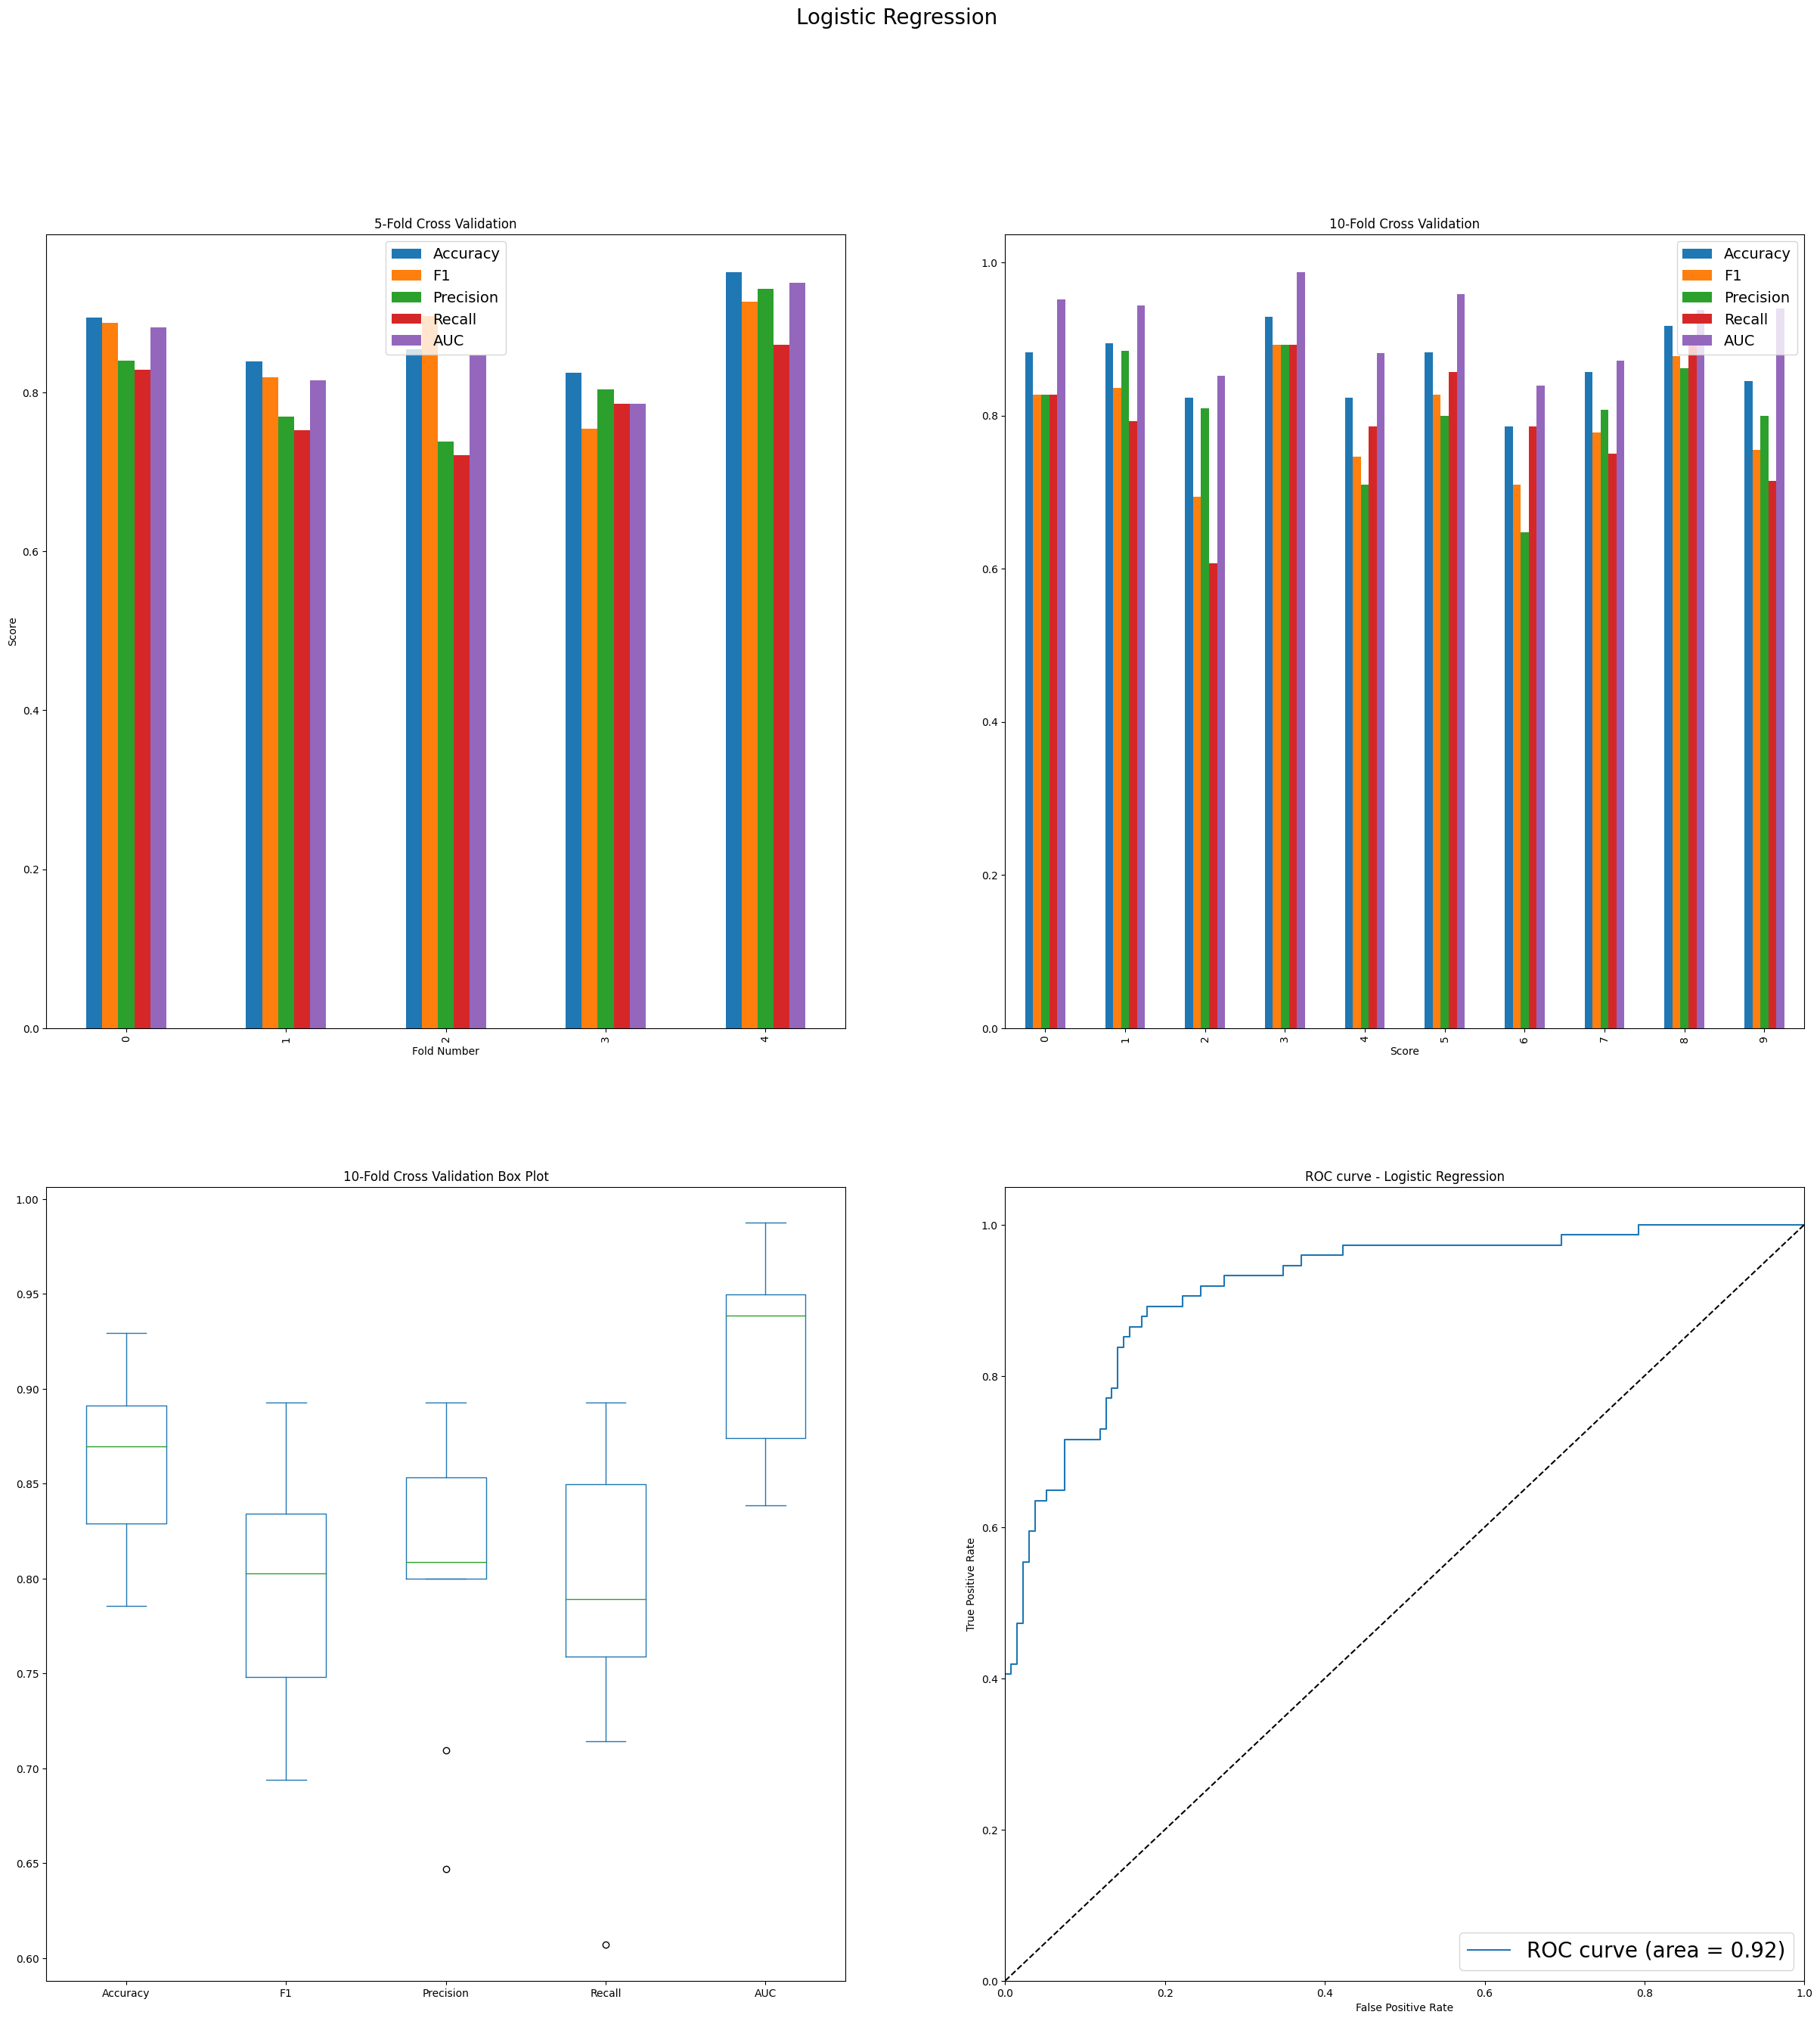

------------------------------K-Nearest Neighbors------------------------------
Training accuracy: 0.8971631205673759, Test accuracy: 0.8038277511961722 
Mean score of 5 folds: 0.8267542779557021
Mean score of 10 folds: 0.822010554517998
Standard Deviation score for 5 folds: 0.06562013866724563
Standard Deviation score for 10 folds: 0.08670161035062944
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.905882  0.866667   0.838710  0.896552  0.932266
1  0.835294  0.781250   0.714286  0.862069  0.911946
2  0.894118  0.823529   0.913043  0.750000  0.907895
3  0.894118  0.852459   0.787879  0.928571  0.943609
4  0.811765  0.741935   0.676471  0.821429  0.857769
5  0.882353  0.833333   0.781250  0.892857  0.941416
6  0.761905  0.696970   0.605263  0.821429  0.817921
7  0.785714  0.653846   0.708333  0.607143  0.832270
8  0.916667  0.872727   0.888889  0.857143  0.929847
9  0.821429  0.727273   0.740741  0.714286  0.860013


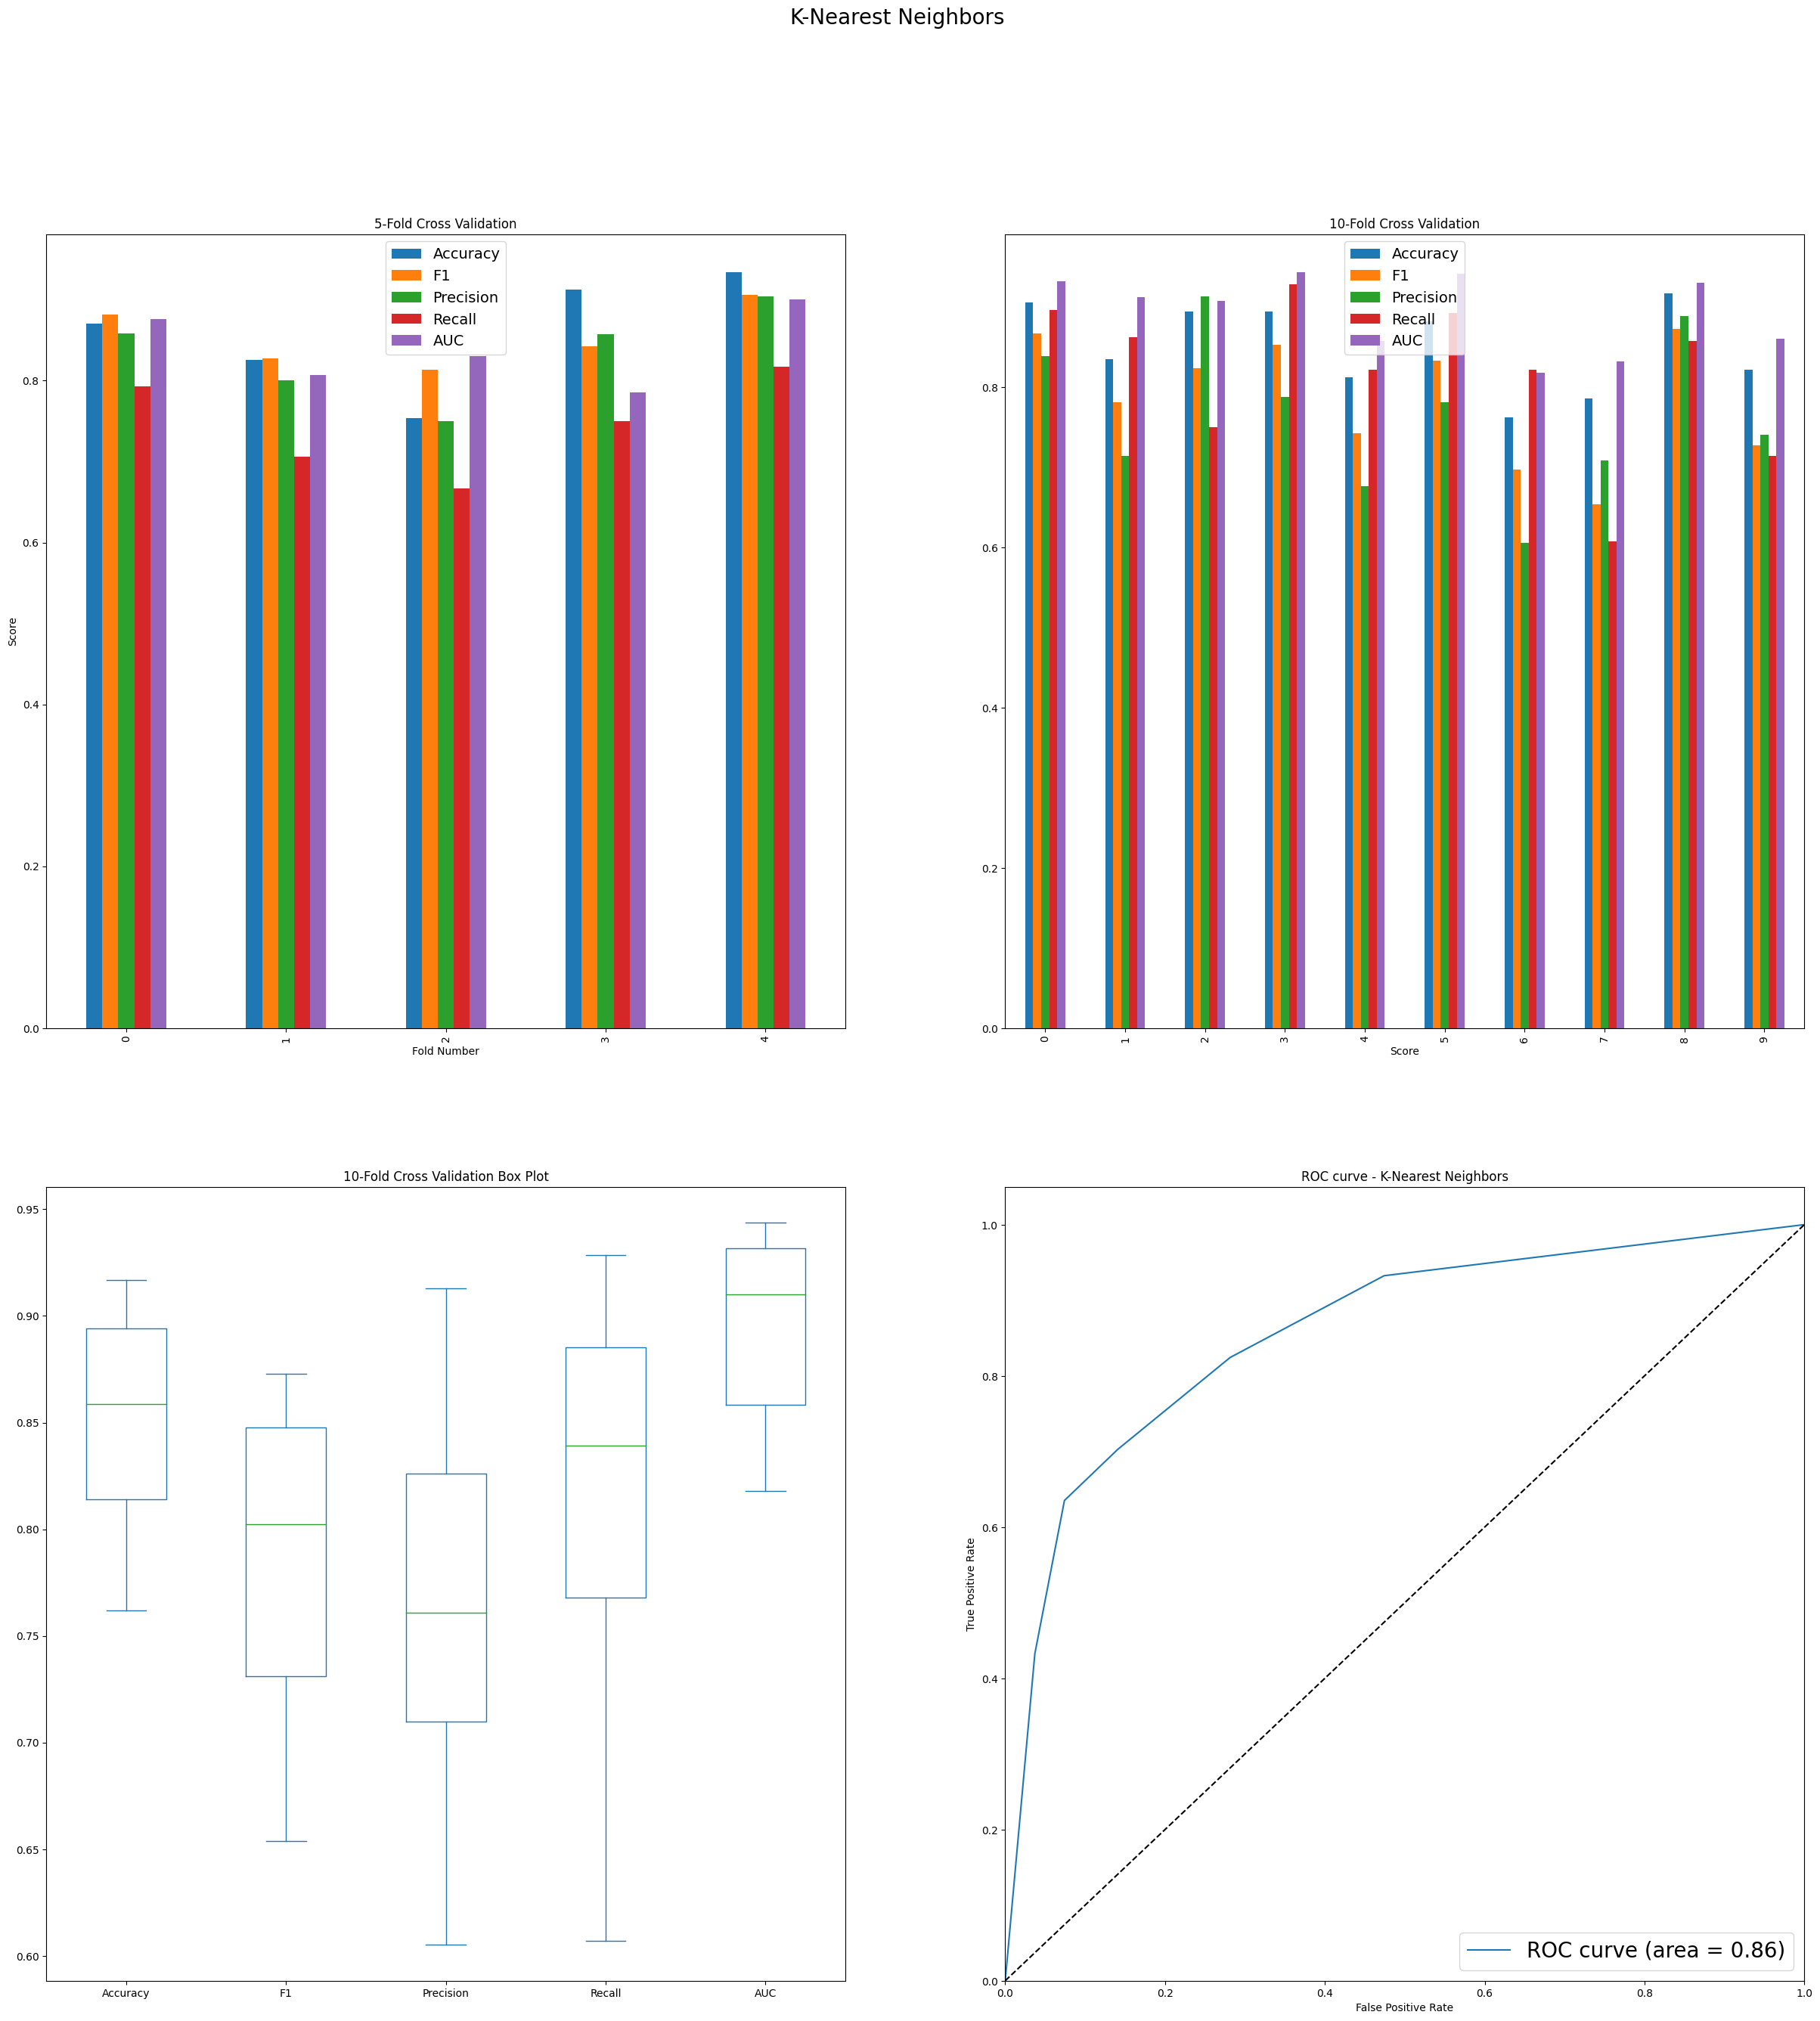

------------------------------Kernel Support Vector Classification------------------------------
Training accuracy: 0.9018912529550828, Test accuracy: 0.8660287081339713 
Mean score of 5 folds: 0.8307897619720441
Mean score of 10 folds: 0.8284755332560384
Standard Deviation score for 5 folds: 0.07614043138649967
Standard Deviation score for 10 folds: 0.08184412330991273
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.894118  0.836364   0.884615  0.793103  0.950123
1  0.894118  0.836364   0.884615  0.793103  0.947660
2  0.858824  0.769231   0.833333  0.714286  0.857143
3  0.917647  0.877193   0.862069  0.892857  0.971805
4  0.823529  0.727273   0.740741  0.714286  0.875940
5  0.870588  0.800000   0.814815  0.785714  0.960526
6  0.797619  0.721311   0.666667  0.785714  0.853316
7  0.809524  0.692308   0.750000  0.642857  0.890944
8  0.916667  0.867925   0.920000  0.821429  0.940051
9  0.833333  0.730769   0.791667  0.678571  0.931122


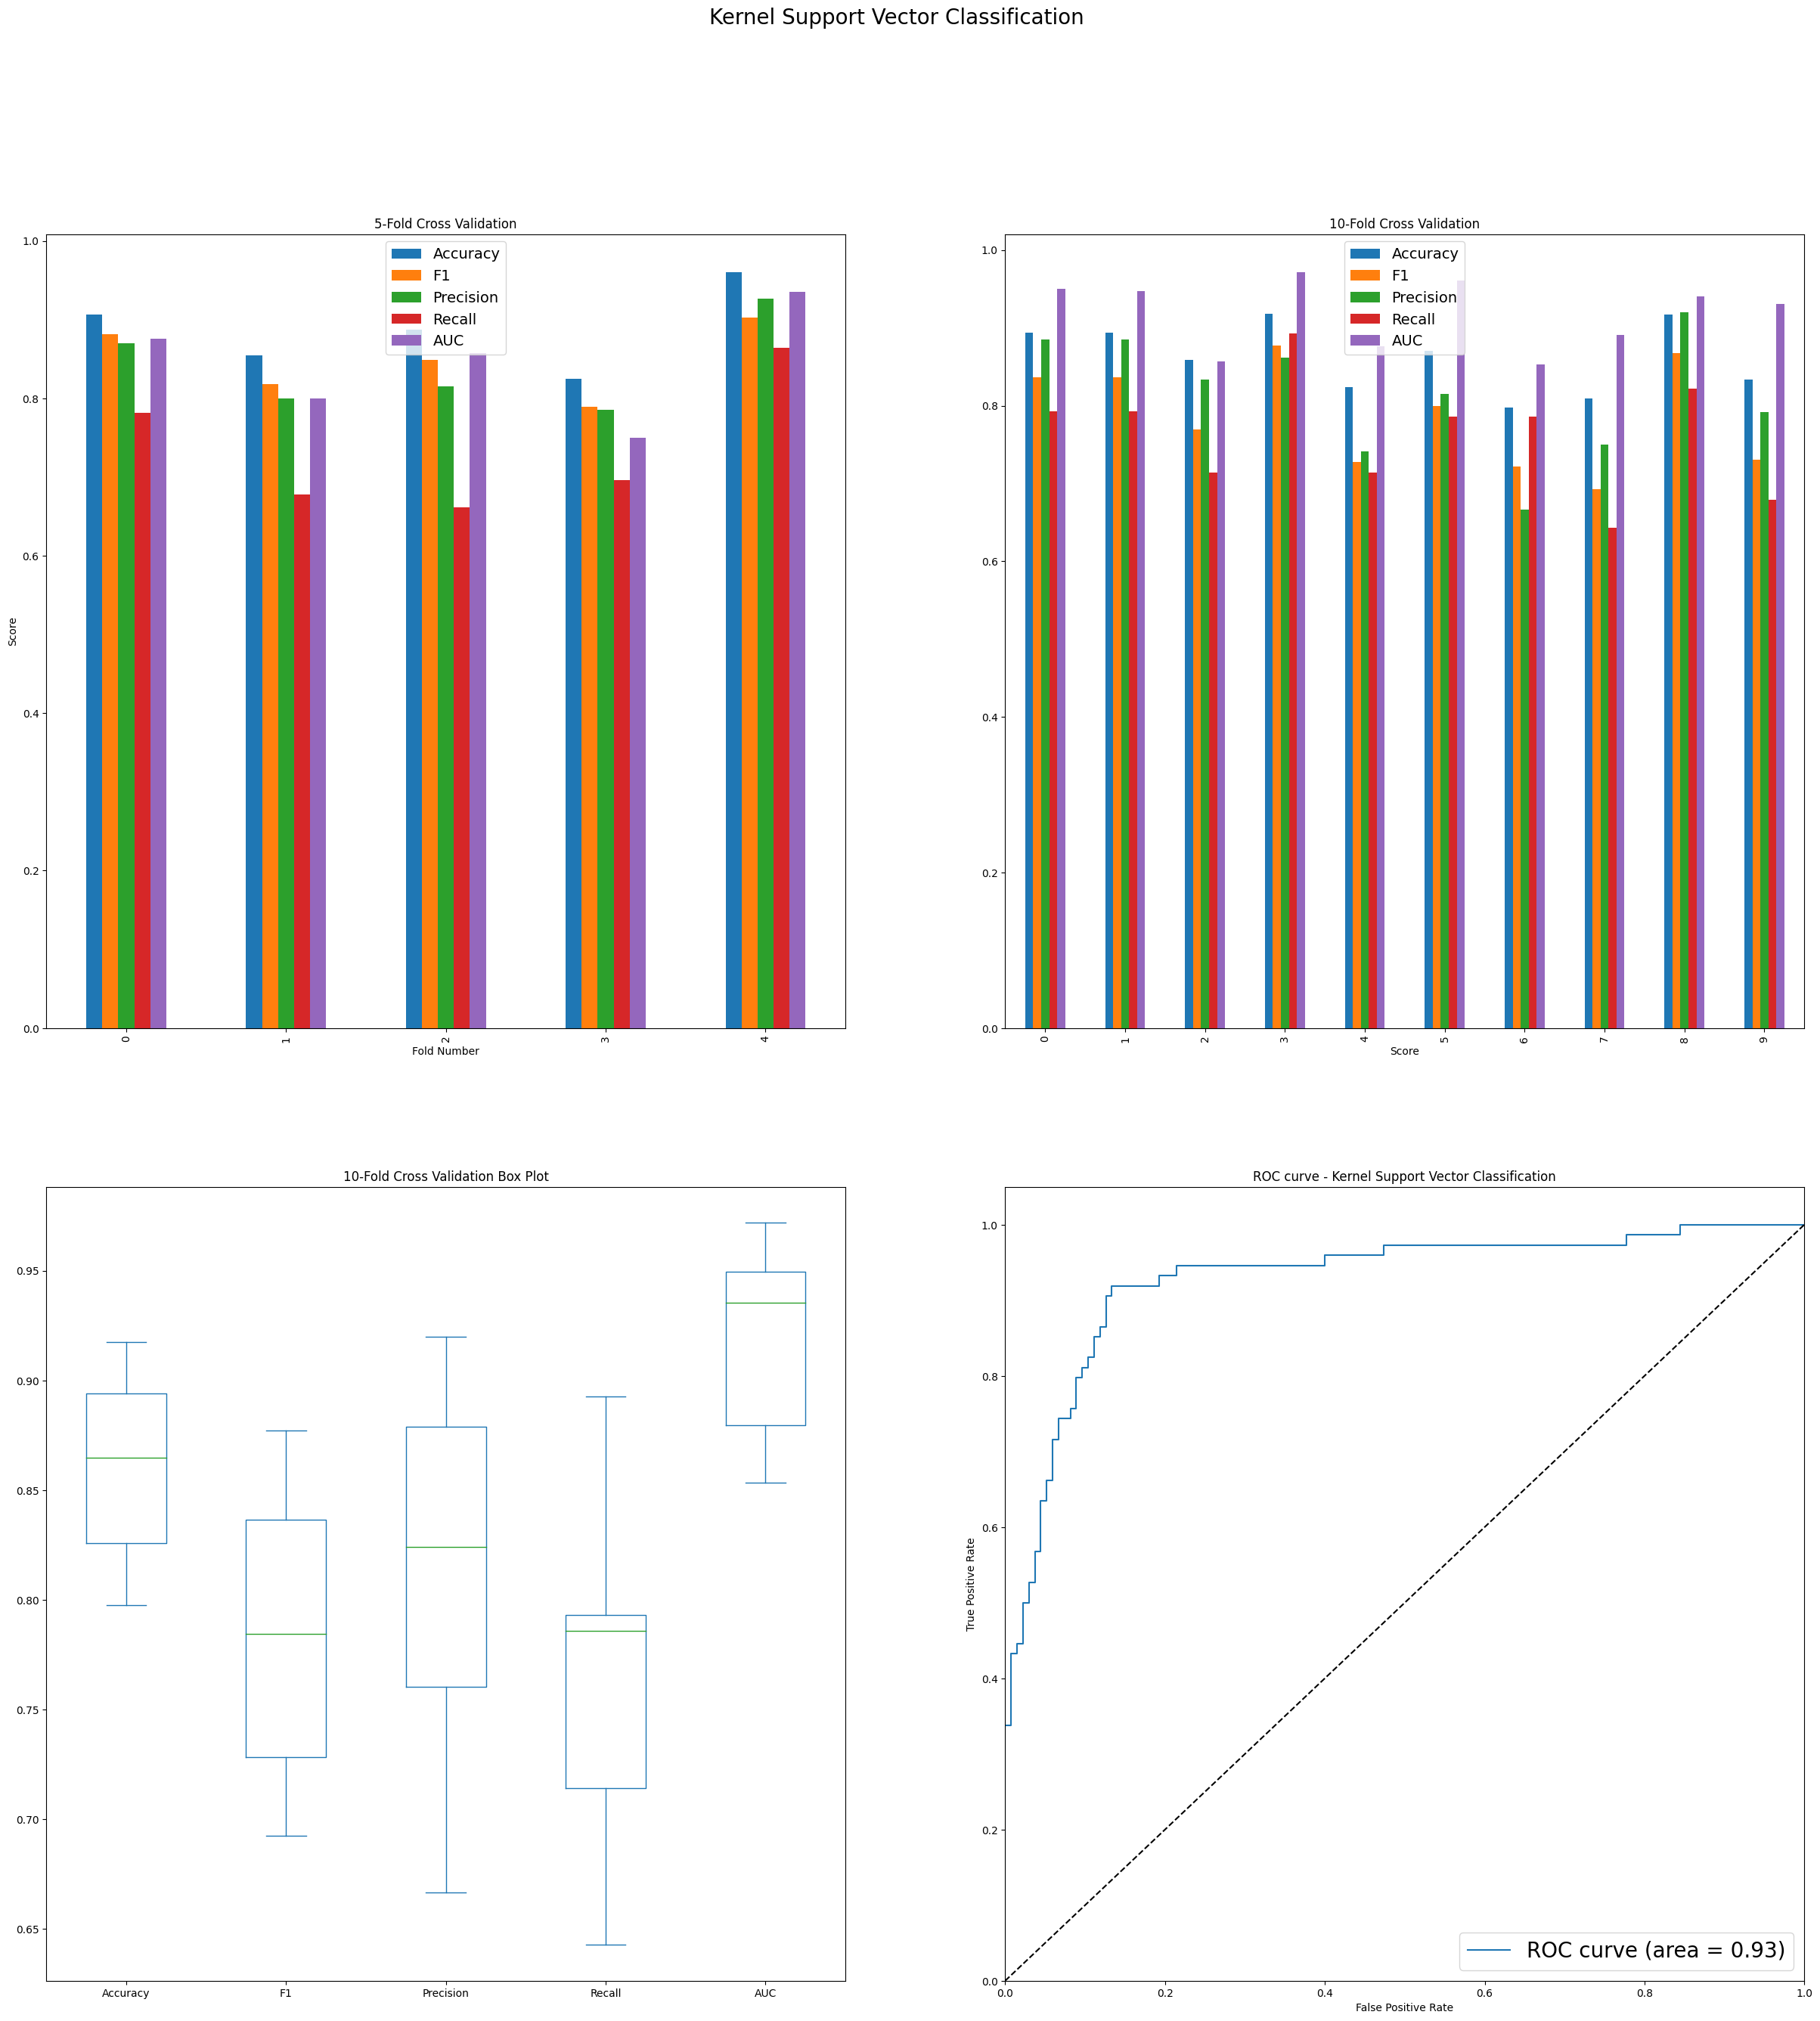

------------------------------Naive Bayes------------------------------
Training accuracy: 0.6713947990543735, Test accuracy: 0.69377990430622 
Mean score of 5 folds: 0.7285395650901617
Mean score of 10 folds: 0.7282895556052932
Standard Deviation score for 5 folds: 0.1575634333806663
Standard Deviation score for 10 folds: 0.16162756748001655
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.764706  0.736842   0.595745  0.965517  0.884544
1  0.694118  0.690476   0.527273  1.000000  0.842672
2  0.694118  0.638889   0.522727  0.821429  0.783835
3  0.729412  0.708861   0.549020  1.000000  0.910401
4  0.682353  0.666667   0.509434  0.964286  0.801065
5  0.576471  0.600000   0.435484  0.964286  0.869048
6  0.595238  0.613636   0.450000  0.964286  0.752232
7  0.666667  0.650000   0.500000  0.928571  0.821110
8  0.678571  0.658228   0.509804  0.928571  0.898597
9  0.654762  0.658824   0.491228  1.000000  0.864477


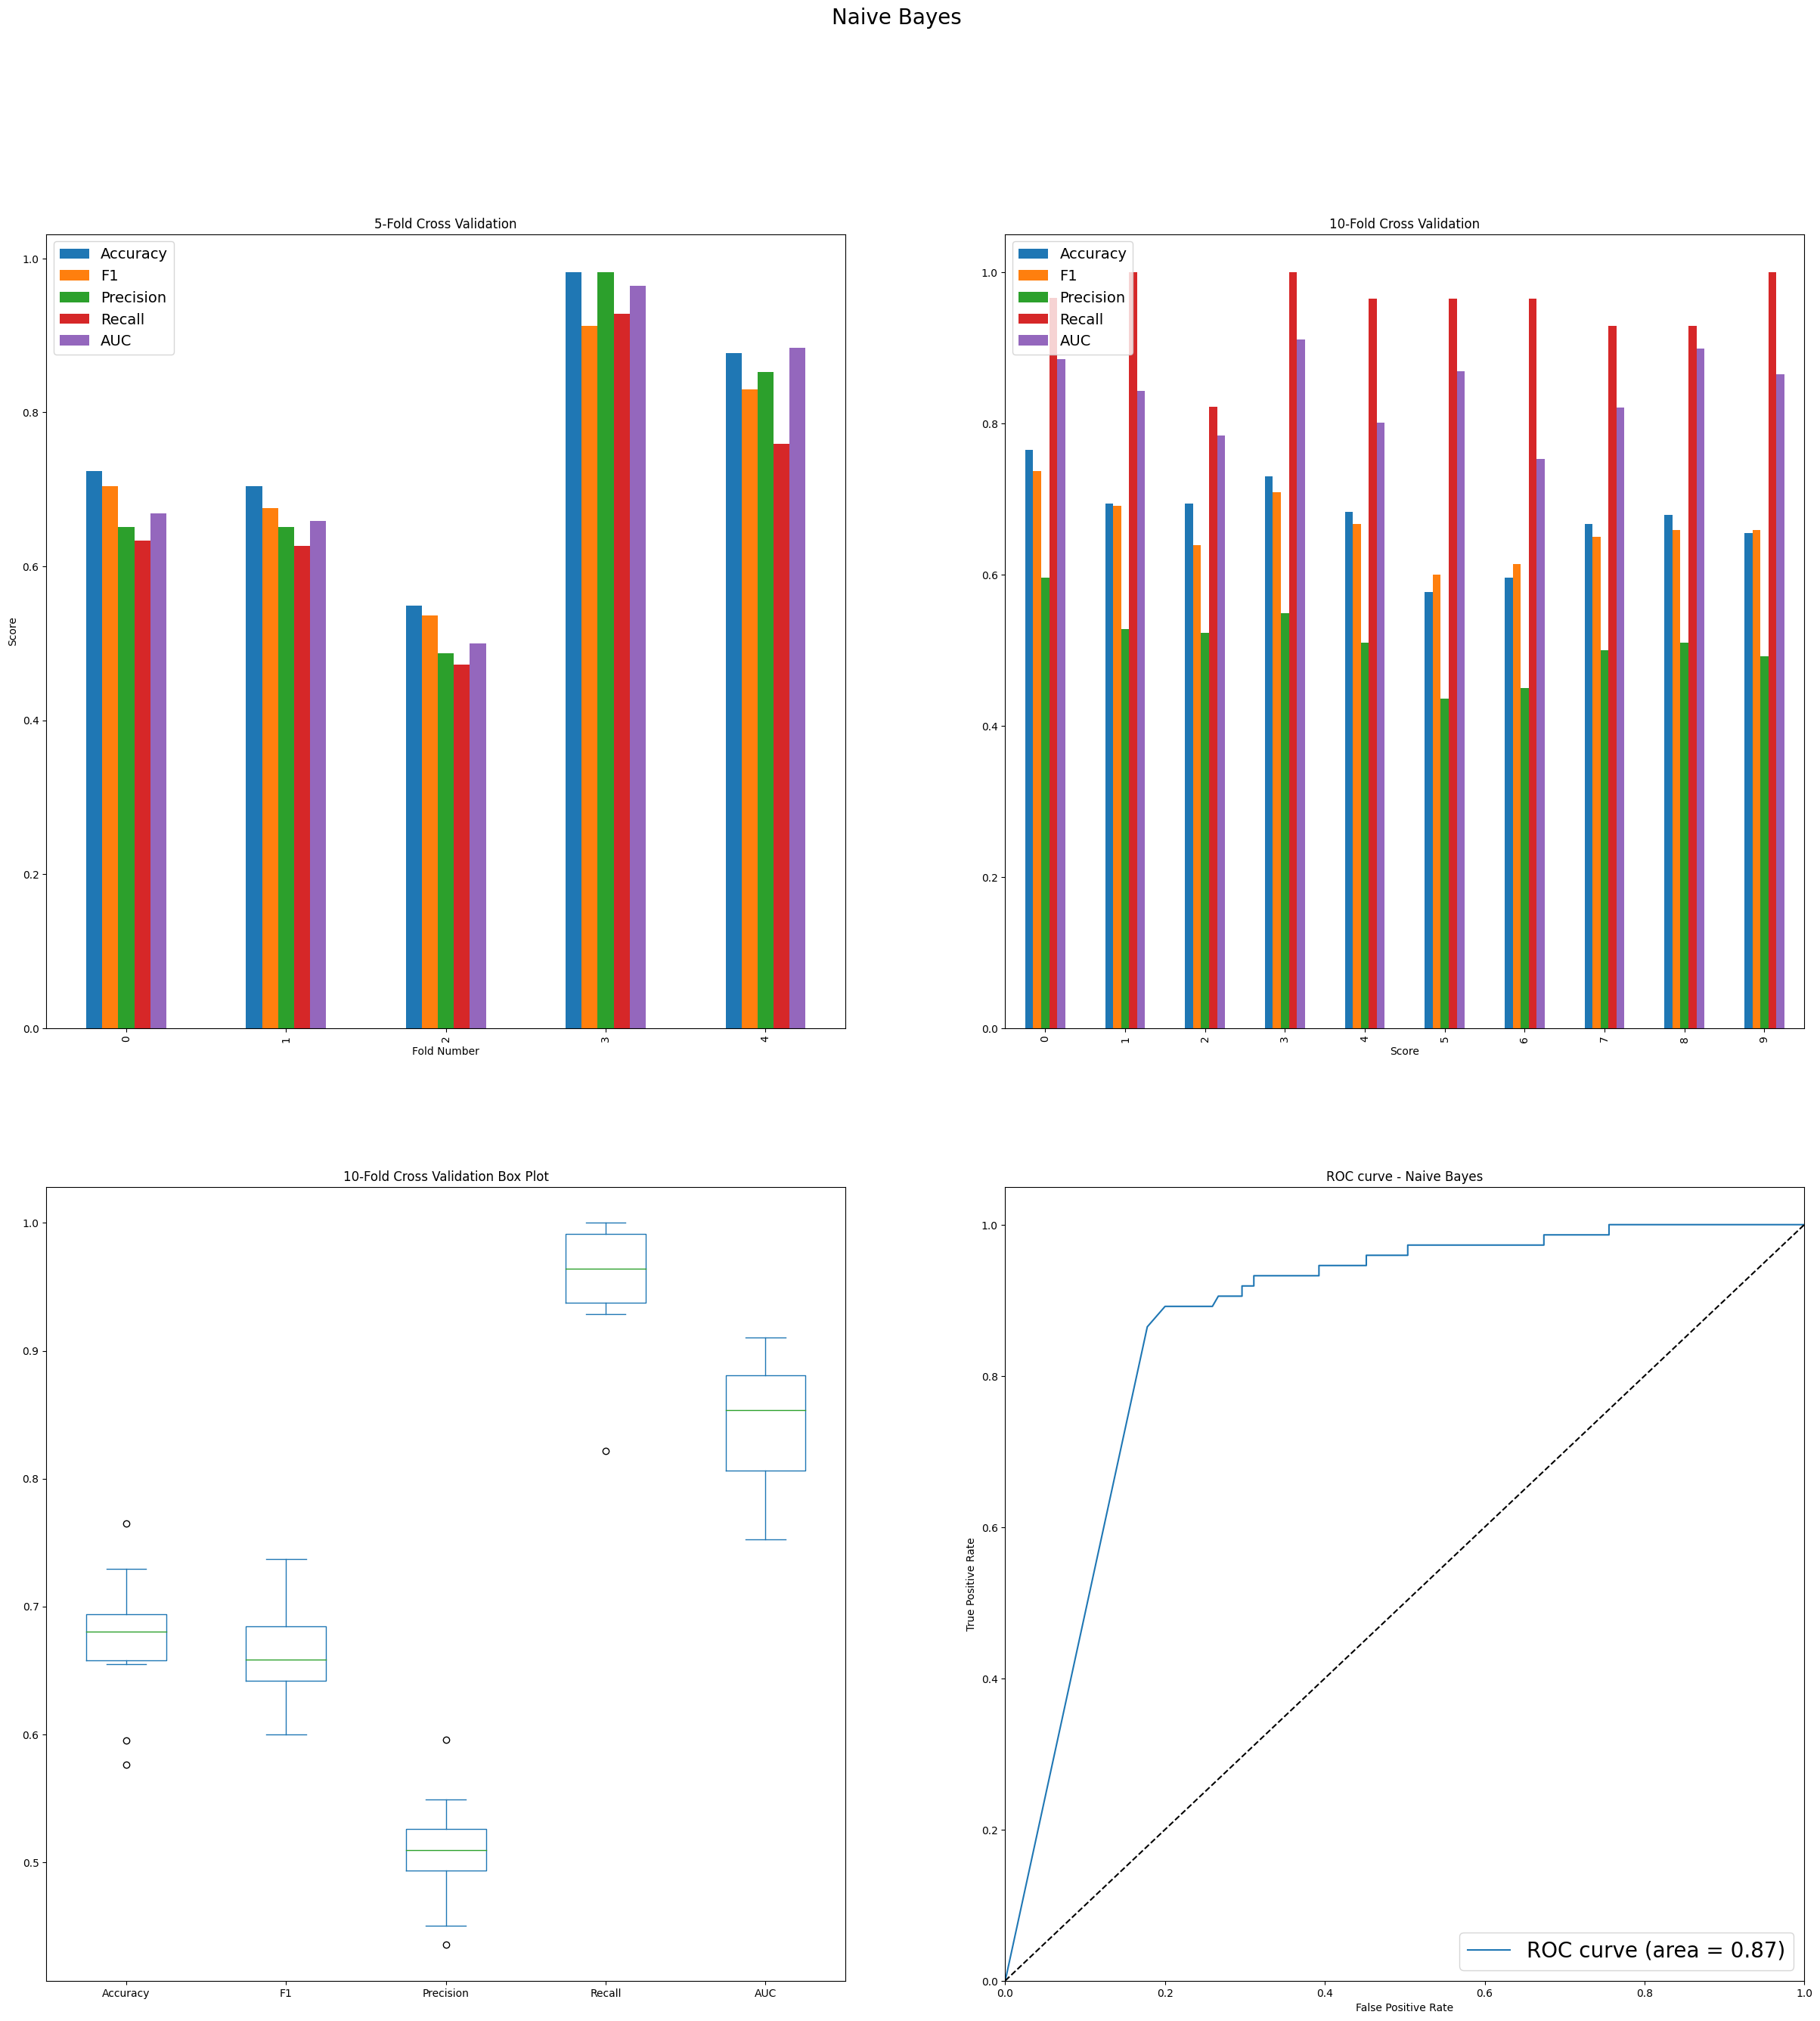

------------------------------Decision Tree Classification------------------------------
Training accuracy: 1.0, Test accuracy: 0.8229665071770335 
Mean score of 5 folds: 0.7512888359346018
Mean score of 10 folds: 0.7400124946439264
Standard Deviation score for 5 folds: 0.06013310055518212
Standard Deviation score for 10 folds: 0.10566490587498882
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.894118  0.847458   0.833333  0.862069  0.886392
1  0.835294  0.774194   0.727273  0.827586  0.833436
2  0.811765  0.692308   0.750000  0.642857  0.768797
3  0.858824  0.793103   0.766667  0.821429  0.849311
4  0.682353  0.509091   0.518519  0.500000  0.635965
5  0.894118  0.836364   0.851852  0.821429  0.875627
6  0.738095  0.645161   0.588235  0.714286  0.732143
7  0.761905  0.655172   0.633333  0.678571  0.741071
8  0.821429  0.727273   0.740741  0.714286  0.794643
9  0.702381  0.576271   0.548387  0.607143  0.678571


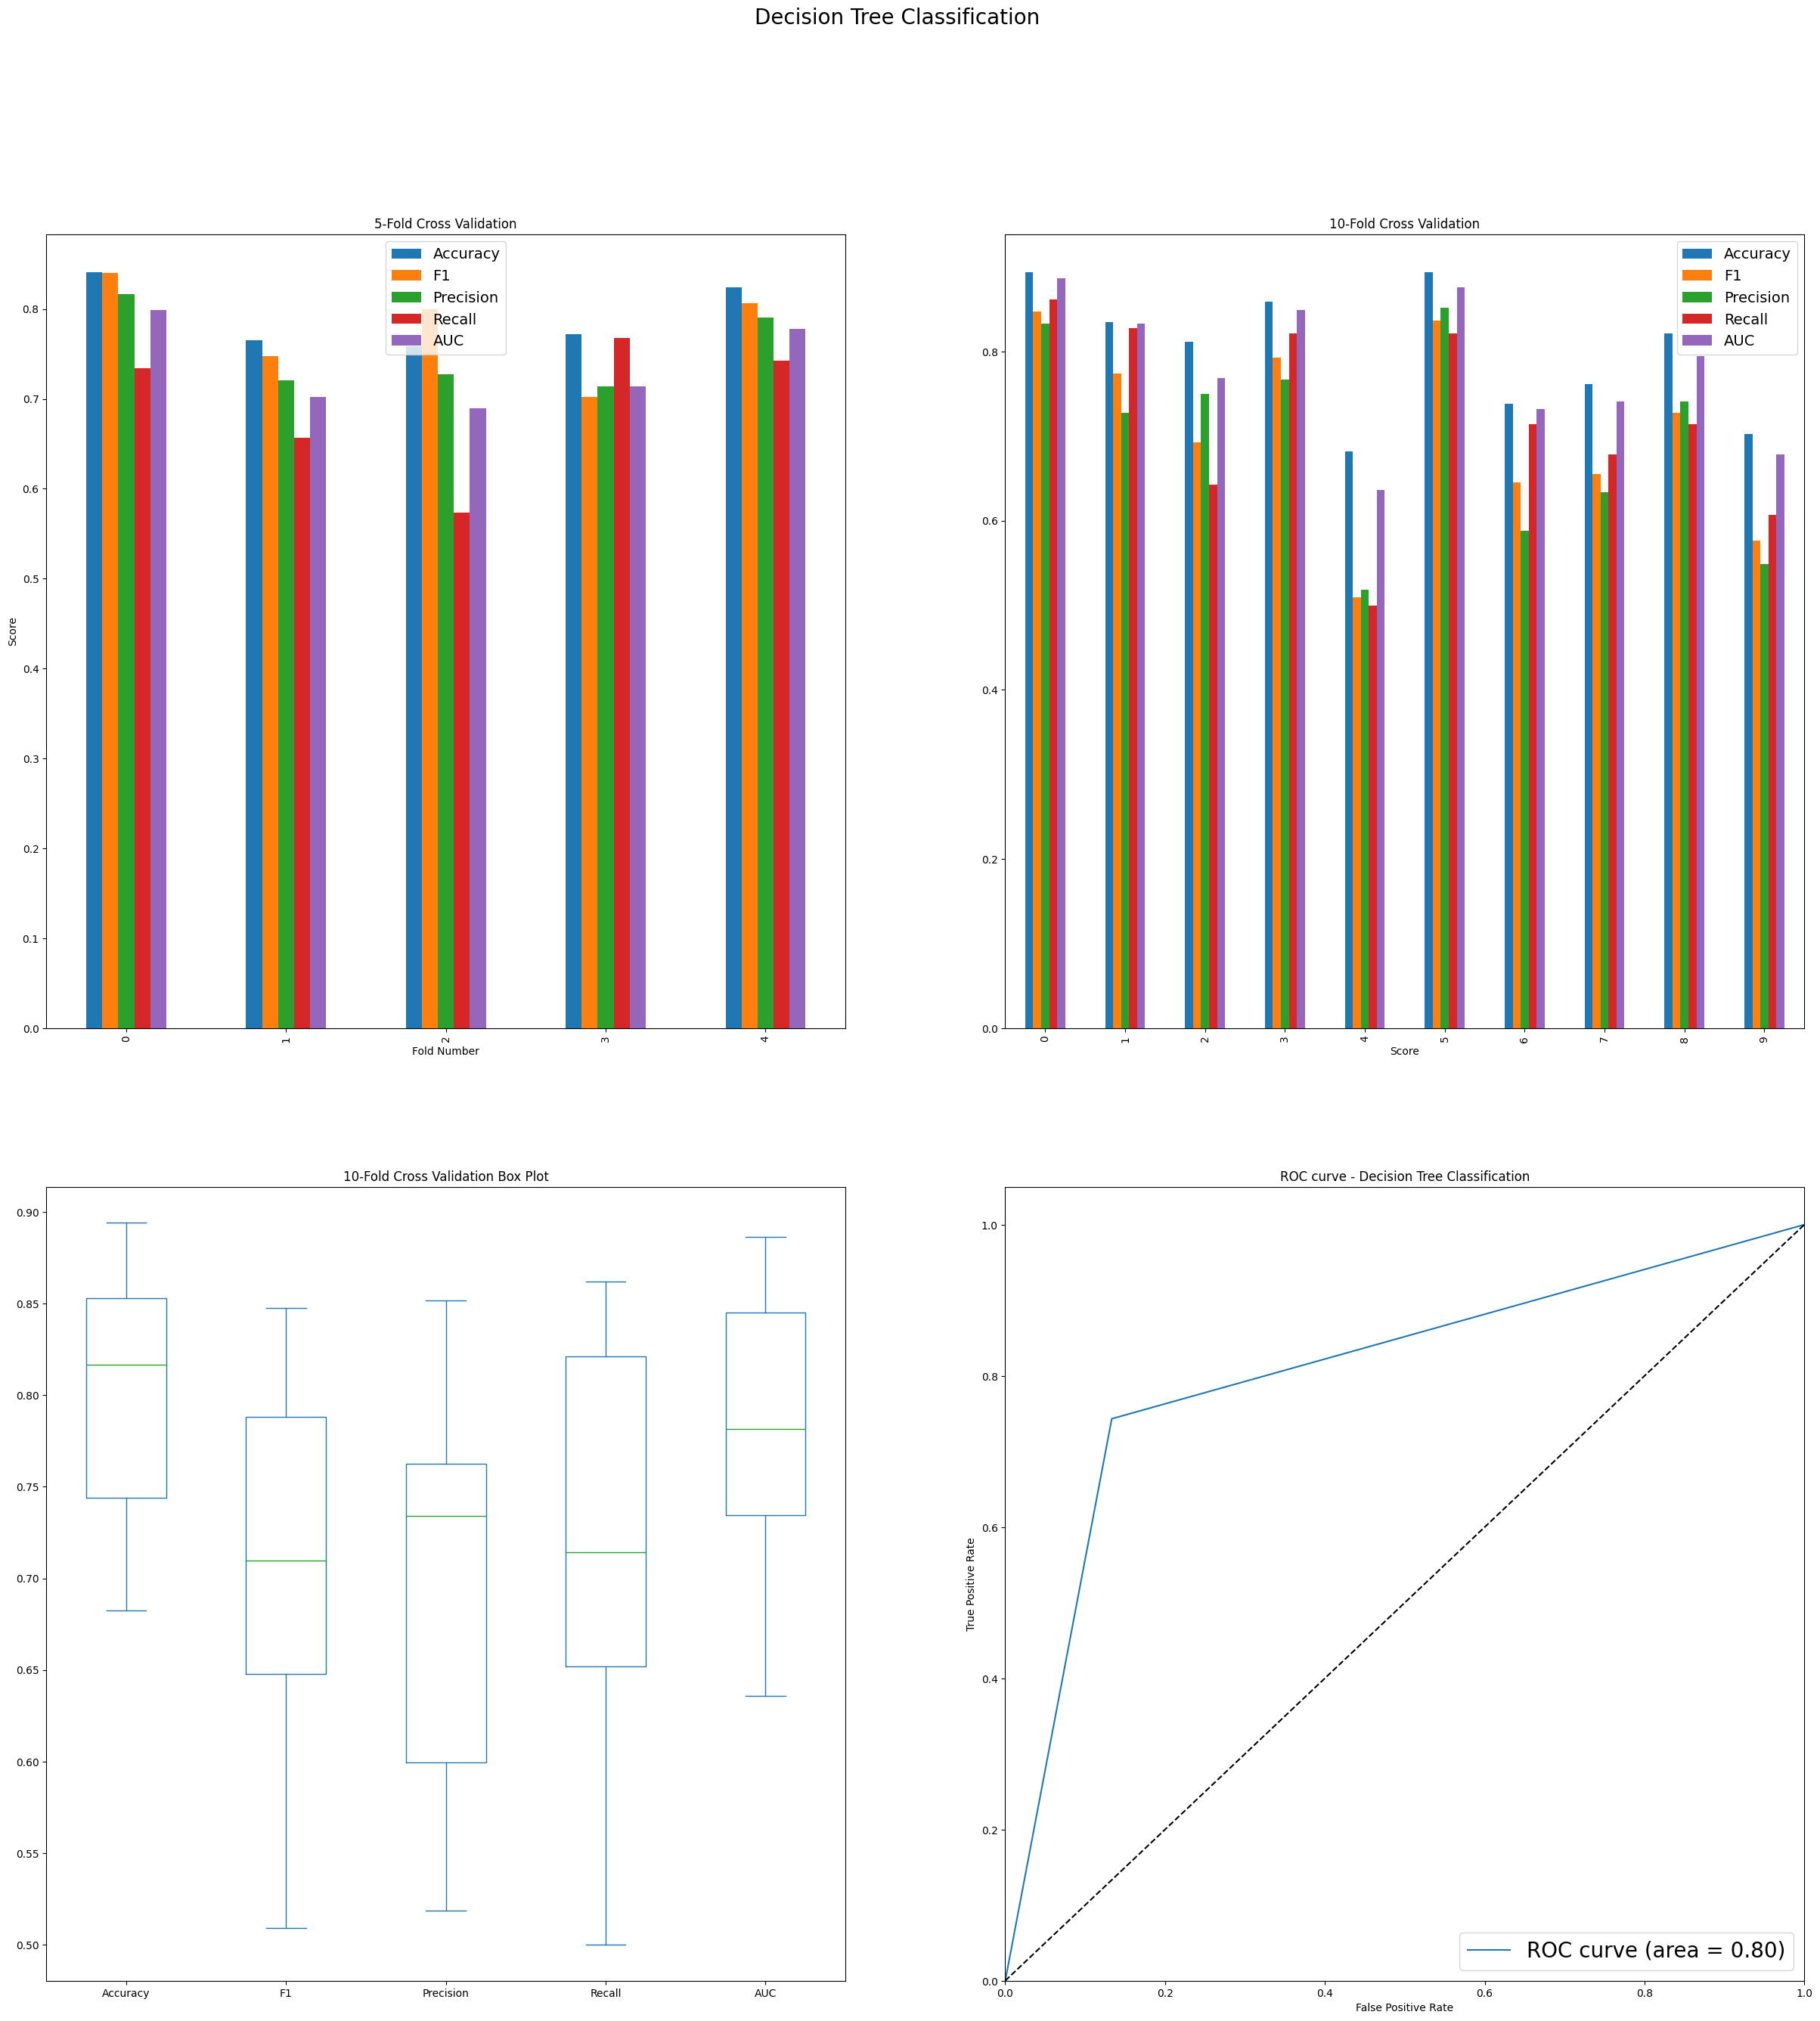

------------------------------Random Forest Classification------------------------------
Training accuracy: 0.9905437352245863, Test accuracy: 0.8181818181818182 
Mean score of 5 folds: 0.7933205133968079
Mean score of 10 folds: 0.8053165392963078
Standard Deviation score for 5 folds: 0.0894565561738928
Standard Deviation score for 10 folds: 0.11066057473957523
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.929412  0.892857   0.925926  0.862069  0.977217
1  0.858824  0.777778   0.840000  0.724138  0.931034
2  0.858824  0.750000   0.900000  0.642857  0.921992
3  0.882353  0.827586   0.800000  0.857143  0.955827
4  0.741176  0.560000   0.636364  0.500000  0.798872
5  0.905882  0.846154   0.916667  0.785714  0.938283
6  0.761905  0.655172   0.633333  0.678571  0.795918
7  0.809524  0.680000   0.772727  0.607143  0.856505
8  0.904762  0.851852   0.884615  0.821429  0.918367
9  0.833333  0.720000   0.818182  0.642857  0.874681


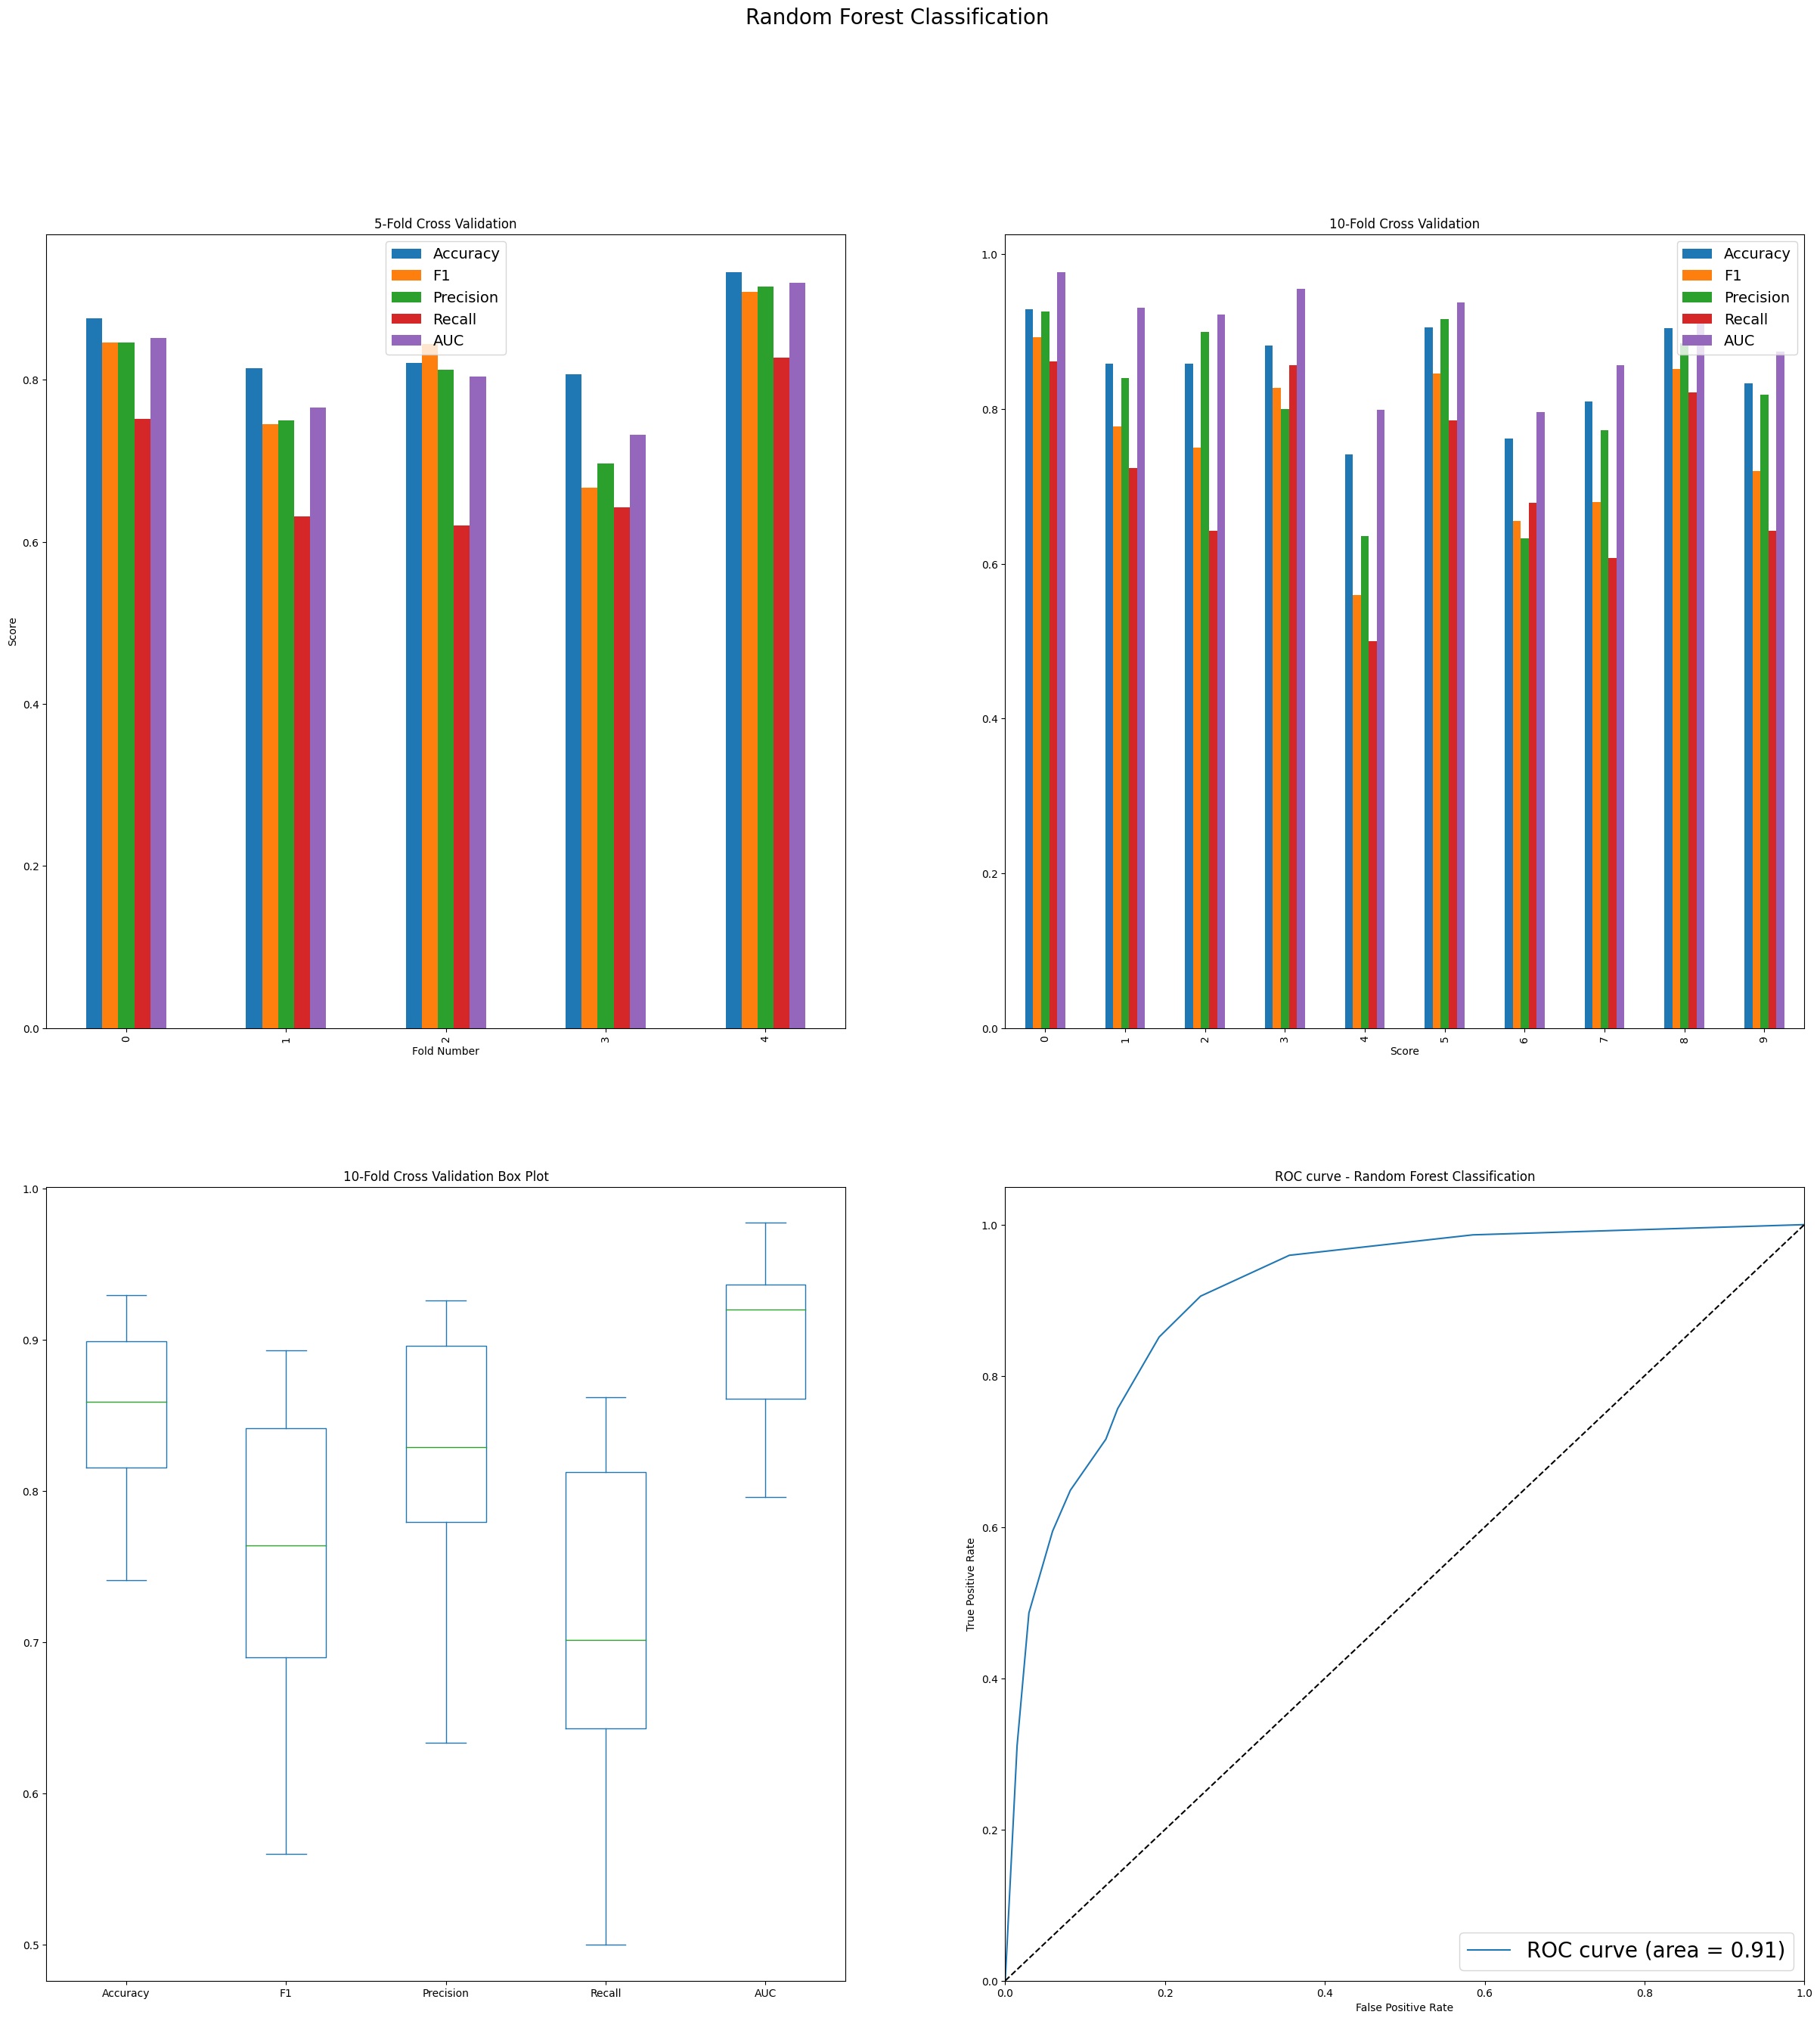

------------------------------XGBoost------------------------------
Training accuracy: 1.0, Test accuracy: 0.8373205741626795 
Mean score of 5 folds: 0.8233962641917671
Mean score of 10 folds: 0.8045980334418208
Standard Deviation score for 5 folds: 0.07081951168727736
Standard Deviation score for 10 folds: 0.09584744823758916
~~~~~~~~~~~~~~~
   Accuracy        F1  Precision    Recall       AUC
0  0.894118  0.852459   0.812500  0.896552  0.963054
1  0.847059  0.771930   0.785714  0.758621  0.908251
2  0.823529  0.705882   0.782609  0.642857  0.884085
3  0.905882  0.857143   0.857143  0.857143  0.964912
4  0.811765  0.680000   0.772727  0.607143  0.872807
5  0.894118  0.823529   0.913043  0.750000  0.975564
6  0.761905  0.666667   0.625000  0.714286  0.830995
7  0.773810  0.666667   0.655172  0.678571  0.867347
8  0.892857  0.836364   0.851852  0.821429  0.906888
9  0.809524  0.692308   0.750000  0.642857  0.913265


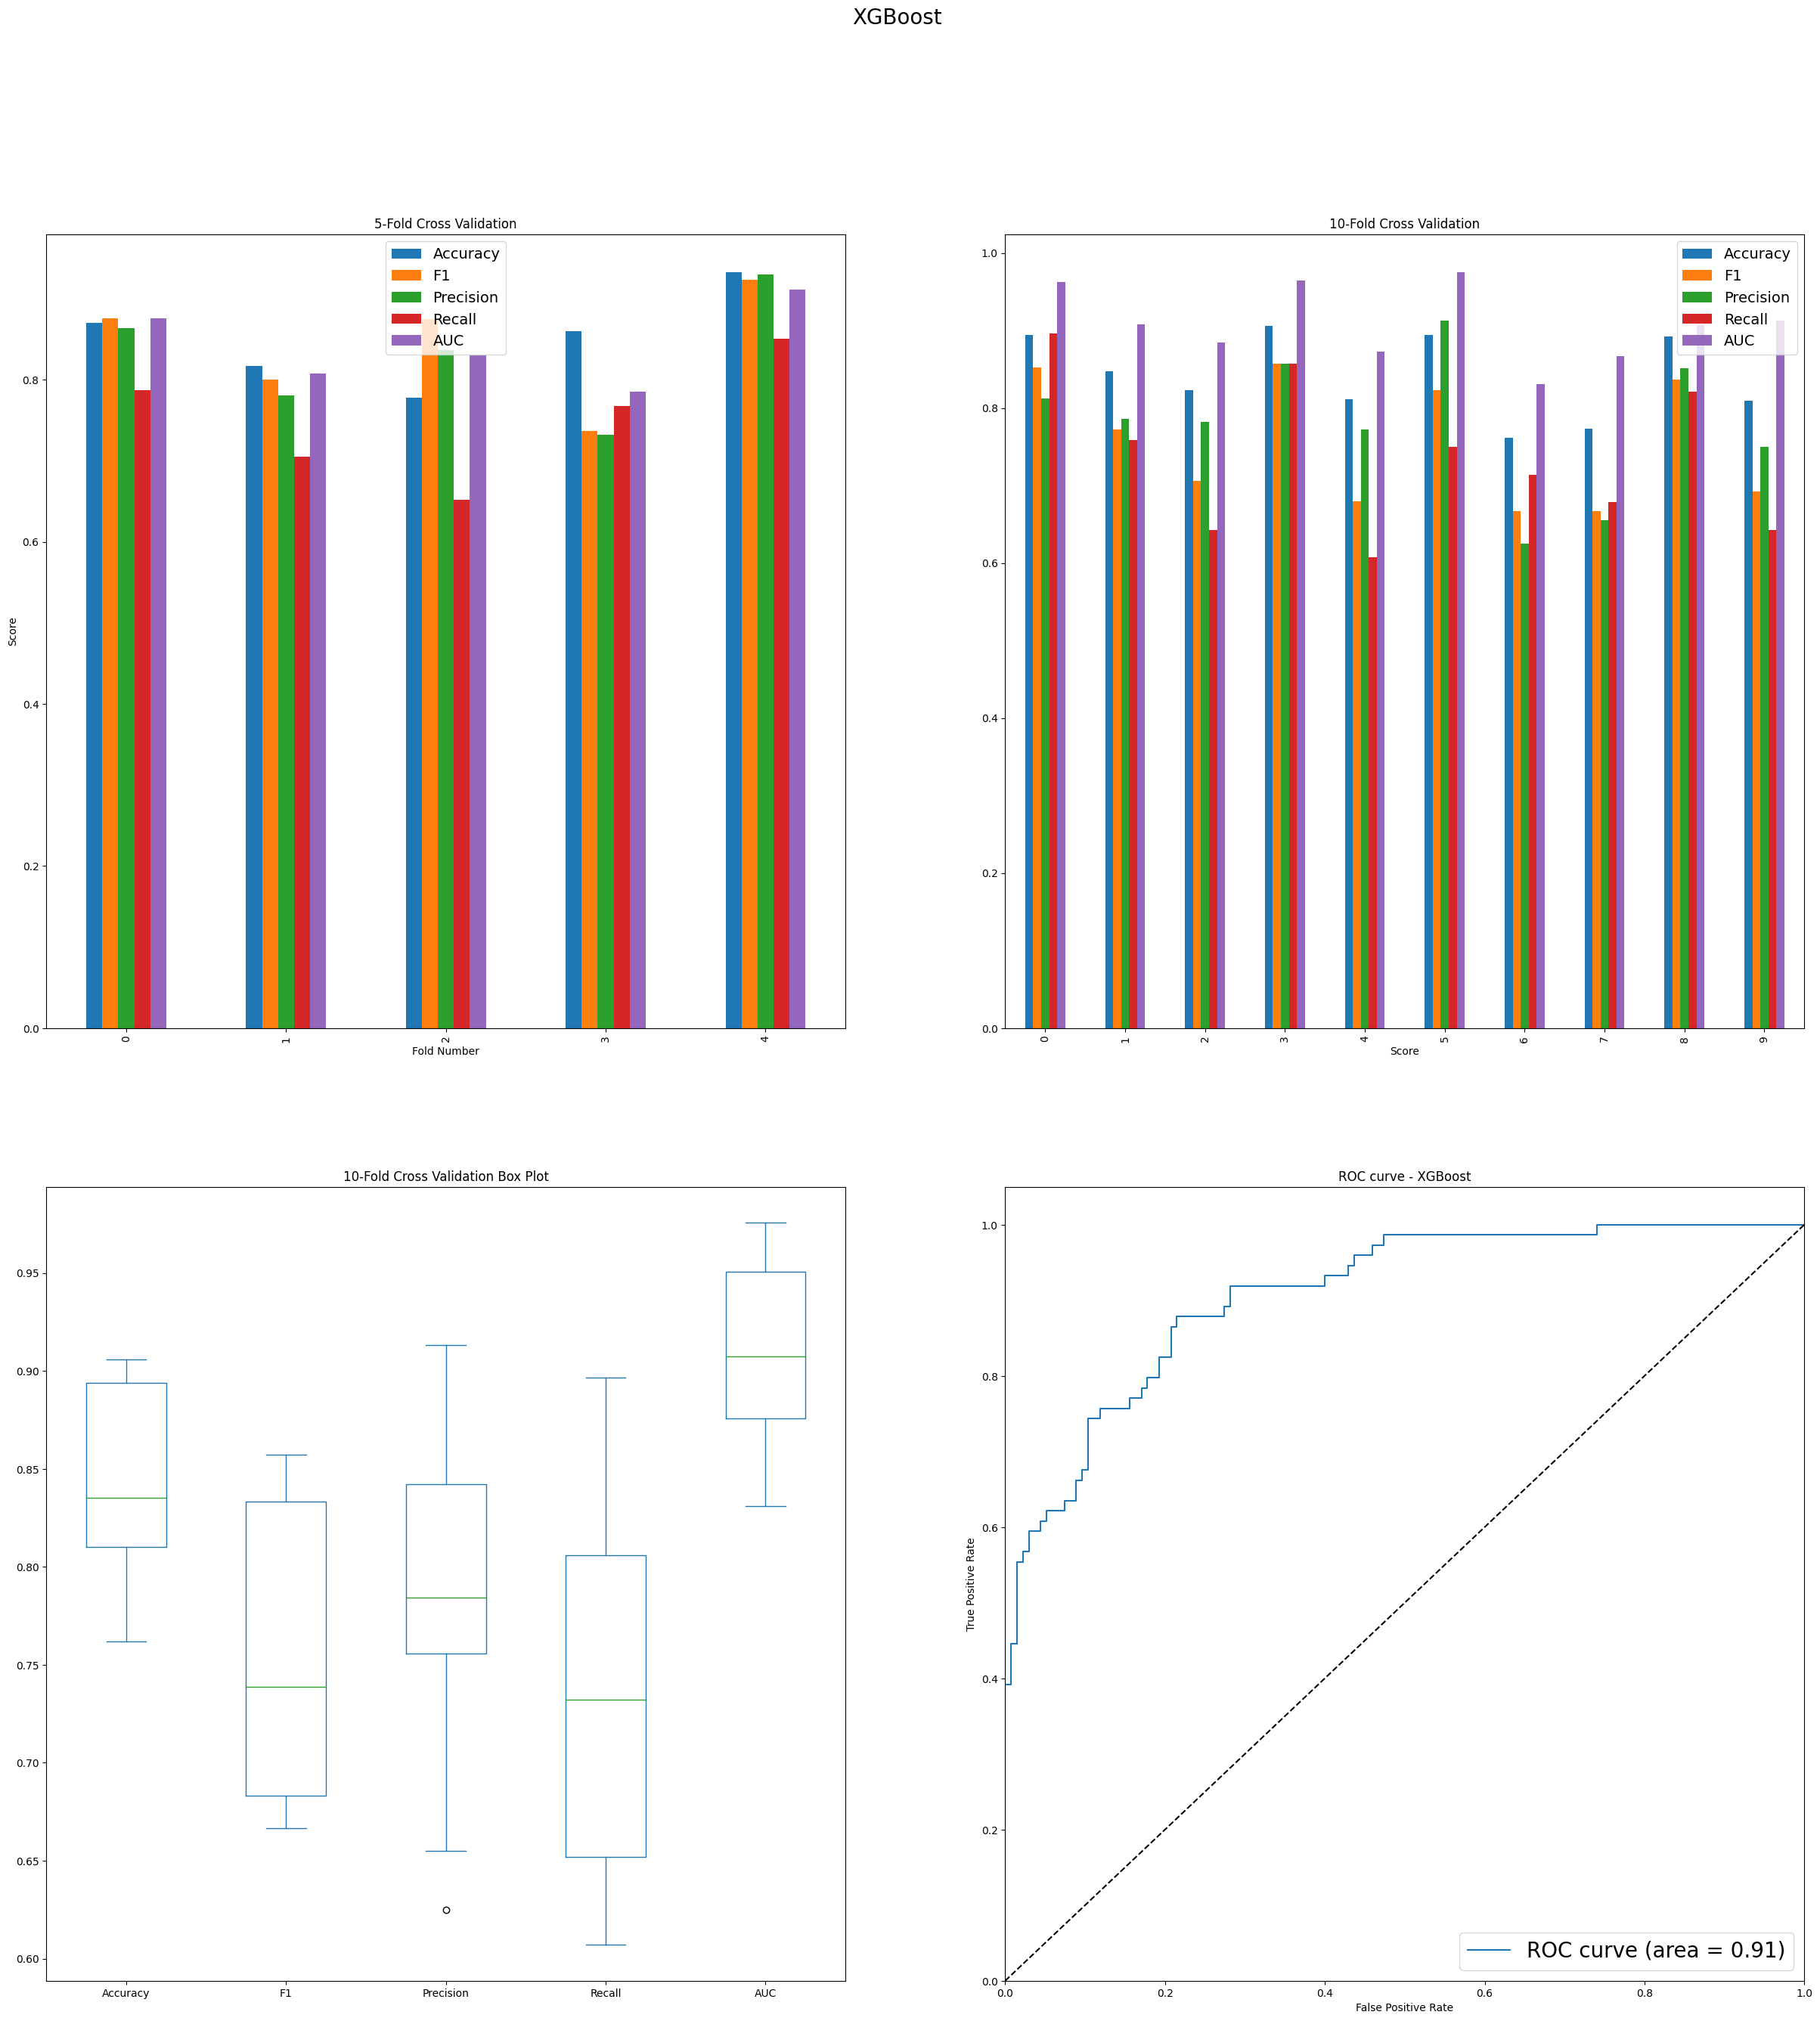

In [82]:
# Go through each model and evaluate it
for model in classifiers:
    print("-"*30 + model + "-"*30)
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30,30))
    fig.suptitle(model, fontsize=20)
    scores_5, scores_10, (fpr, tpr, roc_a) = evaluate_model(model, classifiers[model], X_train, y_train, X_test, y_test)
    print(f"Mean score of 5 folds: {scores_5.mean()}")
    print(f"Mean score of 10 folds: {scores_10.mean()}")
    print(f"Standard Deviation score for 5 folds: {scores_5.std()}")
    print(f"Standard Deviation score for 10 folds: {scores_10.std()}")
    print("~"*15)


    # Plot the ROC curve
    axes[1,1].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_a)
    axes[1,1].plot([0, 1], [0, 1], 'k--')
    axes[1,1].set_xlim([0.0, 1.0])
    axes[1,1].set_ylim([0.0, 1.05])
    axes[1,1].set_xlabel('False Positive Rate')
    axes[1,1].set_ylabel('True Positive Rate')
    axes[1,1].set_title(f'ROC curve - {str(model)}')
    axes[1,1].legend(loc="lower right", fontsize=20)

    score_pd = pd.DataFrame(scores_5, columns=['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'])
    score_pd.plot(ax=axes[0,0], kind='bar', title='5-Fold Cross Validation')

    axes[0,0].set_xlabel('Fold Number')
    axes[0,0].set_ylabel('Score')
    axes[0,0].legend(loc='best', fontsize=14)
    # plt.show()

    score_10_pd = pd.DataFrame(scores_10.T, columns=['Accuracy', 'F1', 'Precision', 'Recall', 'AUC'])
    print(score_10_pd)
    score_10_pd.plot(ax=axes[0,1], kind='bar', title='10-Fold Cross Validation')

    # plt.title(model)
    axes[0,1].set_xlabel('Fold Number')
    axes[0,1].set_xlabel('Score')
    axes[0,1].legend(loc='best', fontsize=14)

    score_10_pd.plot(ax=axes[1,0], kind='box', title='10-Fold Cross Validation Box Plot')
    plt.show()